# Unlock Your Data with Python and SAS Viya

This workshop will use the Python SWAT package on the SAS Viya platform to accelerate your data processing and analytics by taking advantage of SAS Cloud Analytic Services (CAS) on Viya. CAS is a high-performance in-memory analytic engine that performs massively parallel processing (MPP) on data of any size, working with multiple machines, CPUs, and threads for fast results.

You will learn how to access, explore, and analyze data on the distributed CAS server using both familiar Pandas API from the SWAT package, and specific SWAT methods.

**Sign in to JupyterLab**
1. Open Google Chrome and select the **Jupyter Server** bookmark. 
2. If necessary, sign in to JupyterLab by using the password **Student1**.
3. In the **Unlock your data with Python and SAS Viya** folder, open the **Unlock your data with Python and SAS Viya.ipynb** notebook.


**Resources**

- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)







### Simple performance test on 28 million rows of data:
**Local pandas**
- CPU times: total: 10min 2s
- Wall time: 9min 28s
- DataFrame was using 8.5+ GB of memory

**CAS server**
- CPU times: total: 2.98 s
- Wall time: 1min 51s

**NOTES**: 
- This was a simple performance test with a few summarization methods in each environment to achieve similar results. 
- I did not try to optimize the code on either the local Python client or the CAS server.
- My local Python client is limited to 16GB or memory.  
- With additional data exploration, preparation, and more advanced analytics the CAS server will continue to show improvements in speed.



For a more formal benchmarking check out The Futurum Group article [Faster AI & Analytics: SAS Viya Outperforms the Competition](https://futurumgroup.com/sas-viya/).
> "The Performance of SAS Viya was impressive, they didn't just outperform competing AI/ML libraries, they crushed the competition."

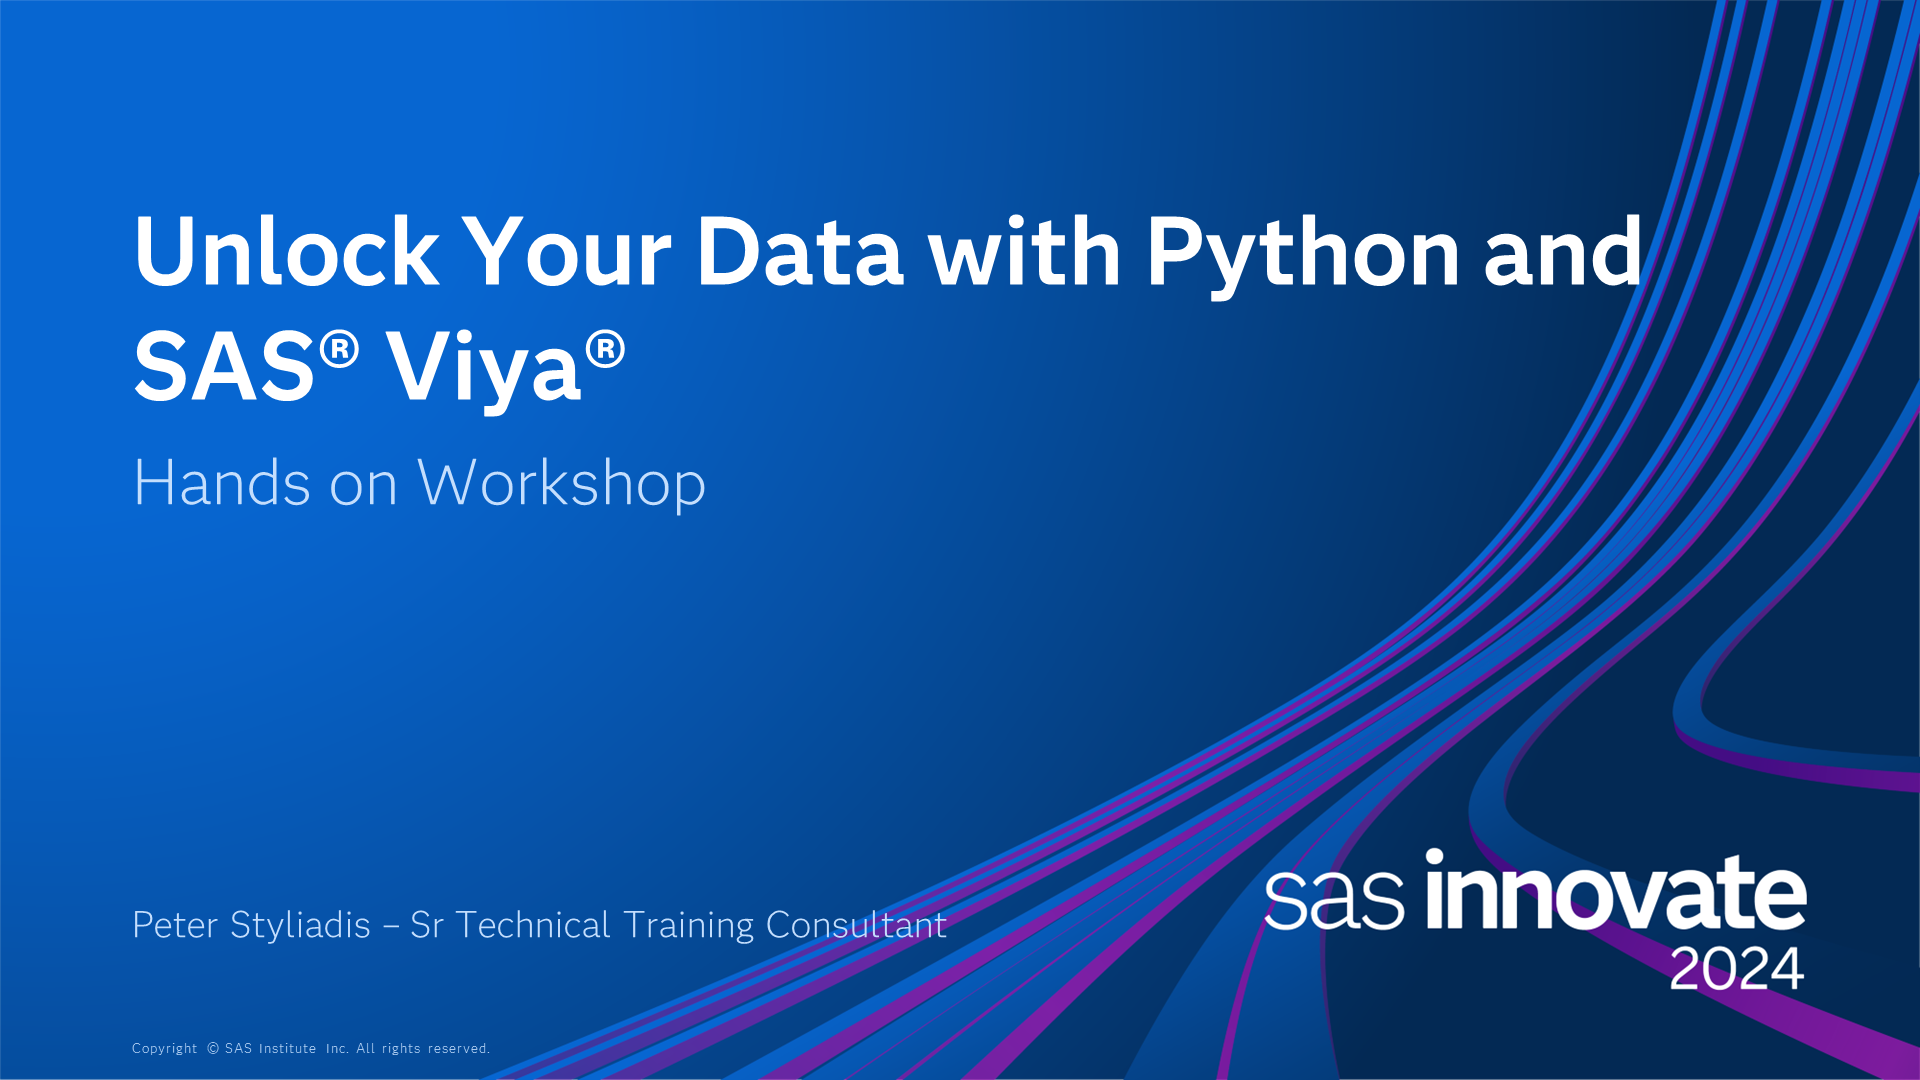

In [4]:
from IPython.display import Image
def display_image(img):
    ''' Custom function to display images for presentation'''
    return Image(url=r'https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/' + img, embed=True, width=1100)

display_image('Innovate2024_01_Intro.PNG')

# Introduction to SAS Viya

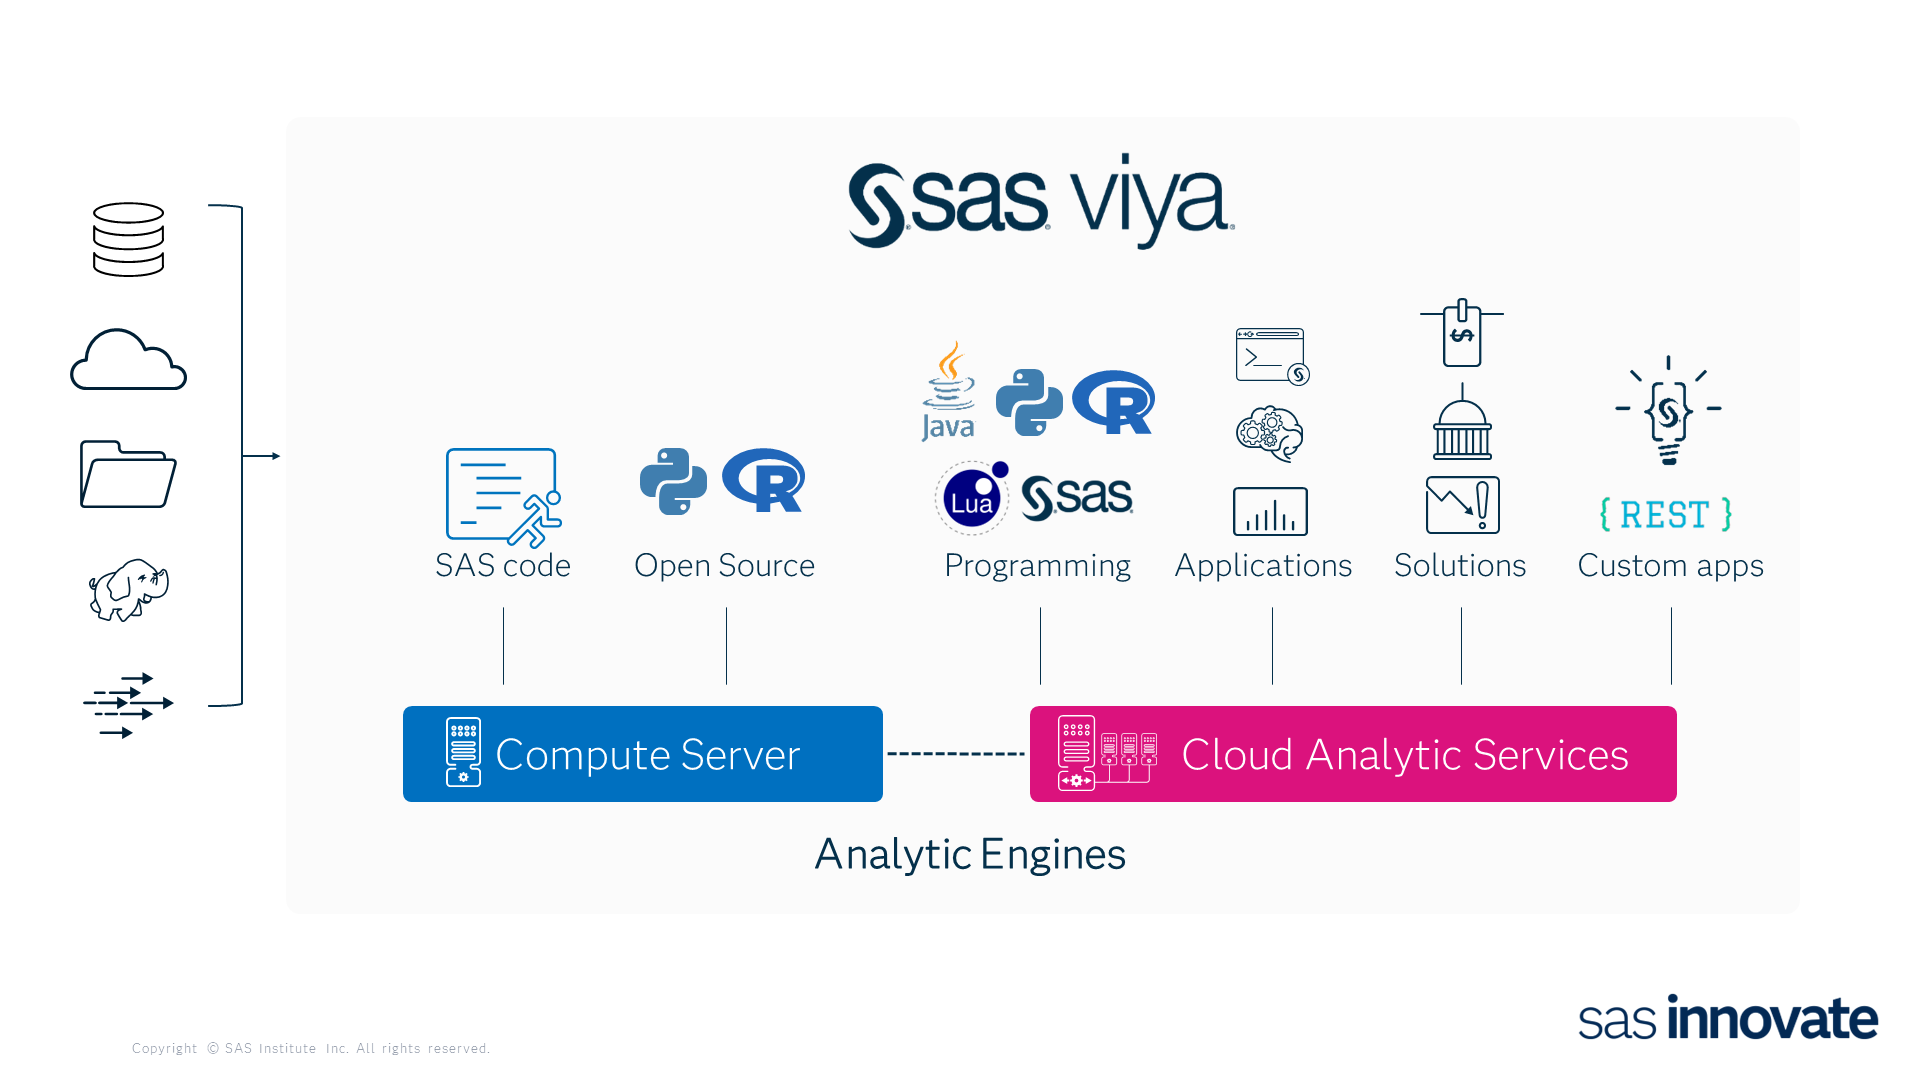

In [8]:
display_image('Innovate2024_03_viya.PNG')

**Expand notes below each slide for more information**

It all begins with data. Your organization likely has a variety of data sources, including data from relational databases, the cloud, folder paths, and Hadoop, as well as streaming data and more. 

With the SAS Viya platform, you can access these data sources with two analytic processing engines: the SAS Compute Server and SAS Cloud Analytic Services, or CAS. Let's discuss each of these at high level.

**SAS Compute Server**

The Compute Server on the SAS Viya platform enables you to execute traditional SAS code like you always have. The Compute Server is similar to the SAS®9 workspace server. If you have SAS programming knowledge or legacy SAS programs, you can still use the Compute Server to run your traditional SAS code with little to no modifications.  The Compute Server also includes some open source integration with Python and R.

**Cloud Analytic Services (CAS)**

The platform also includes the CAS server. CAS is the high-performance, in-memory massively parallel processing (MPP) analytic engine available in SAS Viya.

- CAS enables you to use a variety of programming languages like SAS, Python, R, Lua, or Java to process your data in parallel.
- SAS Viya point-and-click applications use the CAS server for creating dashboards and performing machine learning, text analytics, forecasting, and more.
- SAS Viya industry-specific solutions also use the CAS server's MPP environment (for example, SAS Anti-Money Laundering, SAS Model Risk Manager, SAS Customer Intelligence 360, and others).
- Lastly, you can create custom applications for your organization using the CAS server and REST APIs.

The CAS server is a powerful analytic engine built for the entire organization, no matter the job role, skill level, or programming language.

[SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)




**SAS Viya Architecture**

This architecture provides a single platform with end-to-end capabilities that unify technologies, people, and processes.

- It democratizes data and analytics by providing applications and programming languages that enable you to work with your data no matter your job role or skill level. This ensures that everyone can make faster, better decisions
- It is a cloud-native and cloud-agnostic platform, enabling your organization to run efficiently and smoothly, independent of cloud providers.
- Its in-memory engine and massively parallel processing capabilities can have a big impact on execution speed for your big data and resource-intensive programs.
- It enables SAS and open source programmers to easily work together in the language that they are most comfortable in.
- Together, these features provide a modern analytics engine that can take you from data access and preparation to relevant, actionable results, embedding proven AI that delivers results and helps you discover new opportunities. And it’s all through a scalable, web-based access for your data processing needs.


[SAS® Viya® - AI and Analytics Platform](https://www.sas.com/en_us/software/viya.html)

[Programming Documentation for the SAS® Viya® Platform](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsaswlcm/titlepage.htm?fromDefault=)

## CAS Server Overview

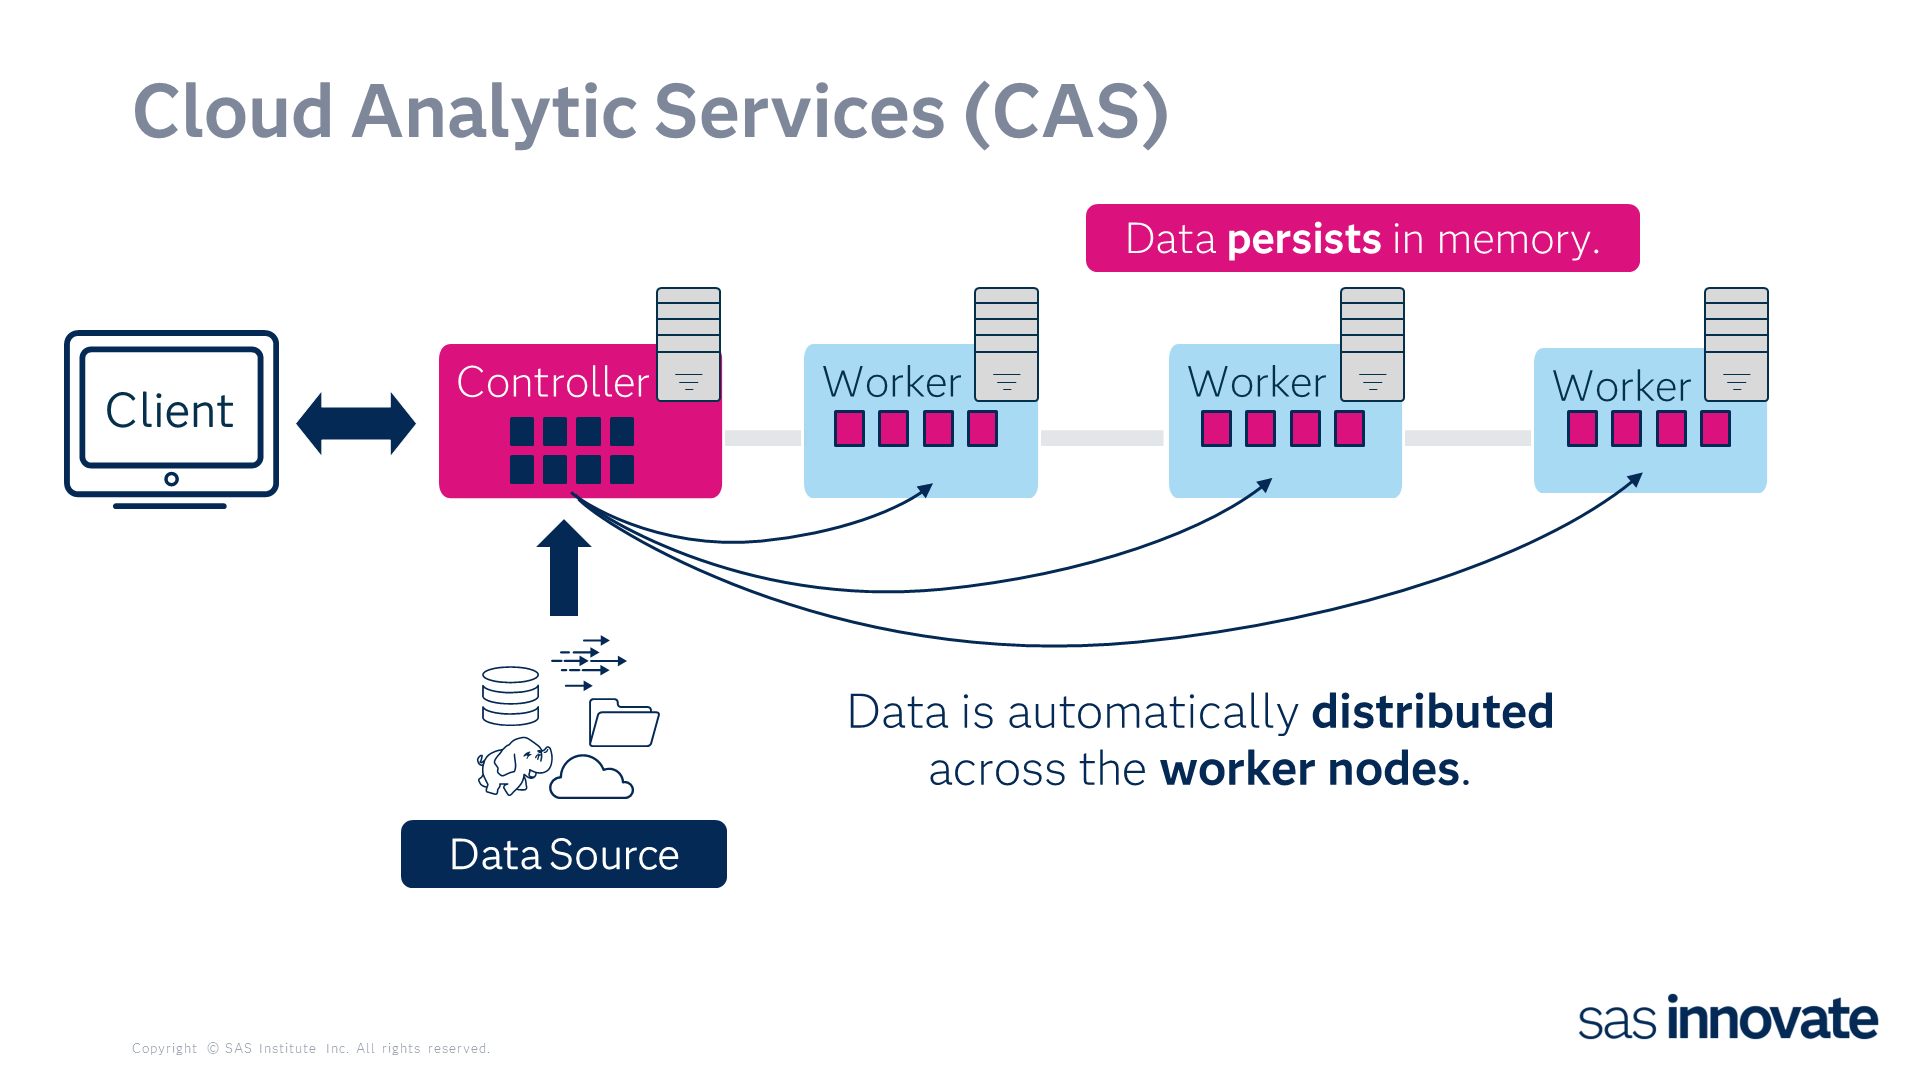

In [9]:
display_image('Innovate2024_04_cas.PNG')

The CAS server is the cloud-native, high-performance in-memory analytics and massively parallel processing engine. The CAS server is configured to run on multiple machines. Typically, you will have one controller node and several worker nodes. You need to make a connection to the CAS server from your client. This is called a CAS session or CAS connection.

SAS Documentation - [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/casfun/titlepage.htm?fromDefault=)


For data to be processed in CAS, data is copied into memory from some physical storage, and data blocks are automatically distributed across the worker nodes. Once data is loaded into memory it persists in memory until explicitly dropped or the CAS session ends.

SAS Documentation - [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm)

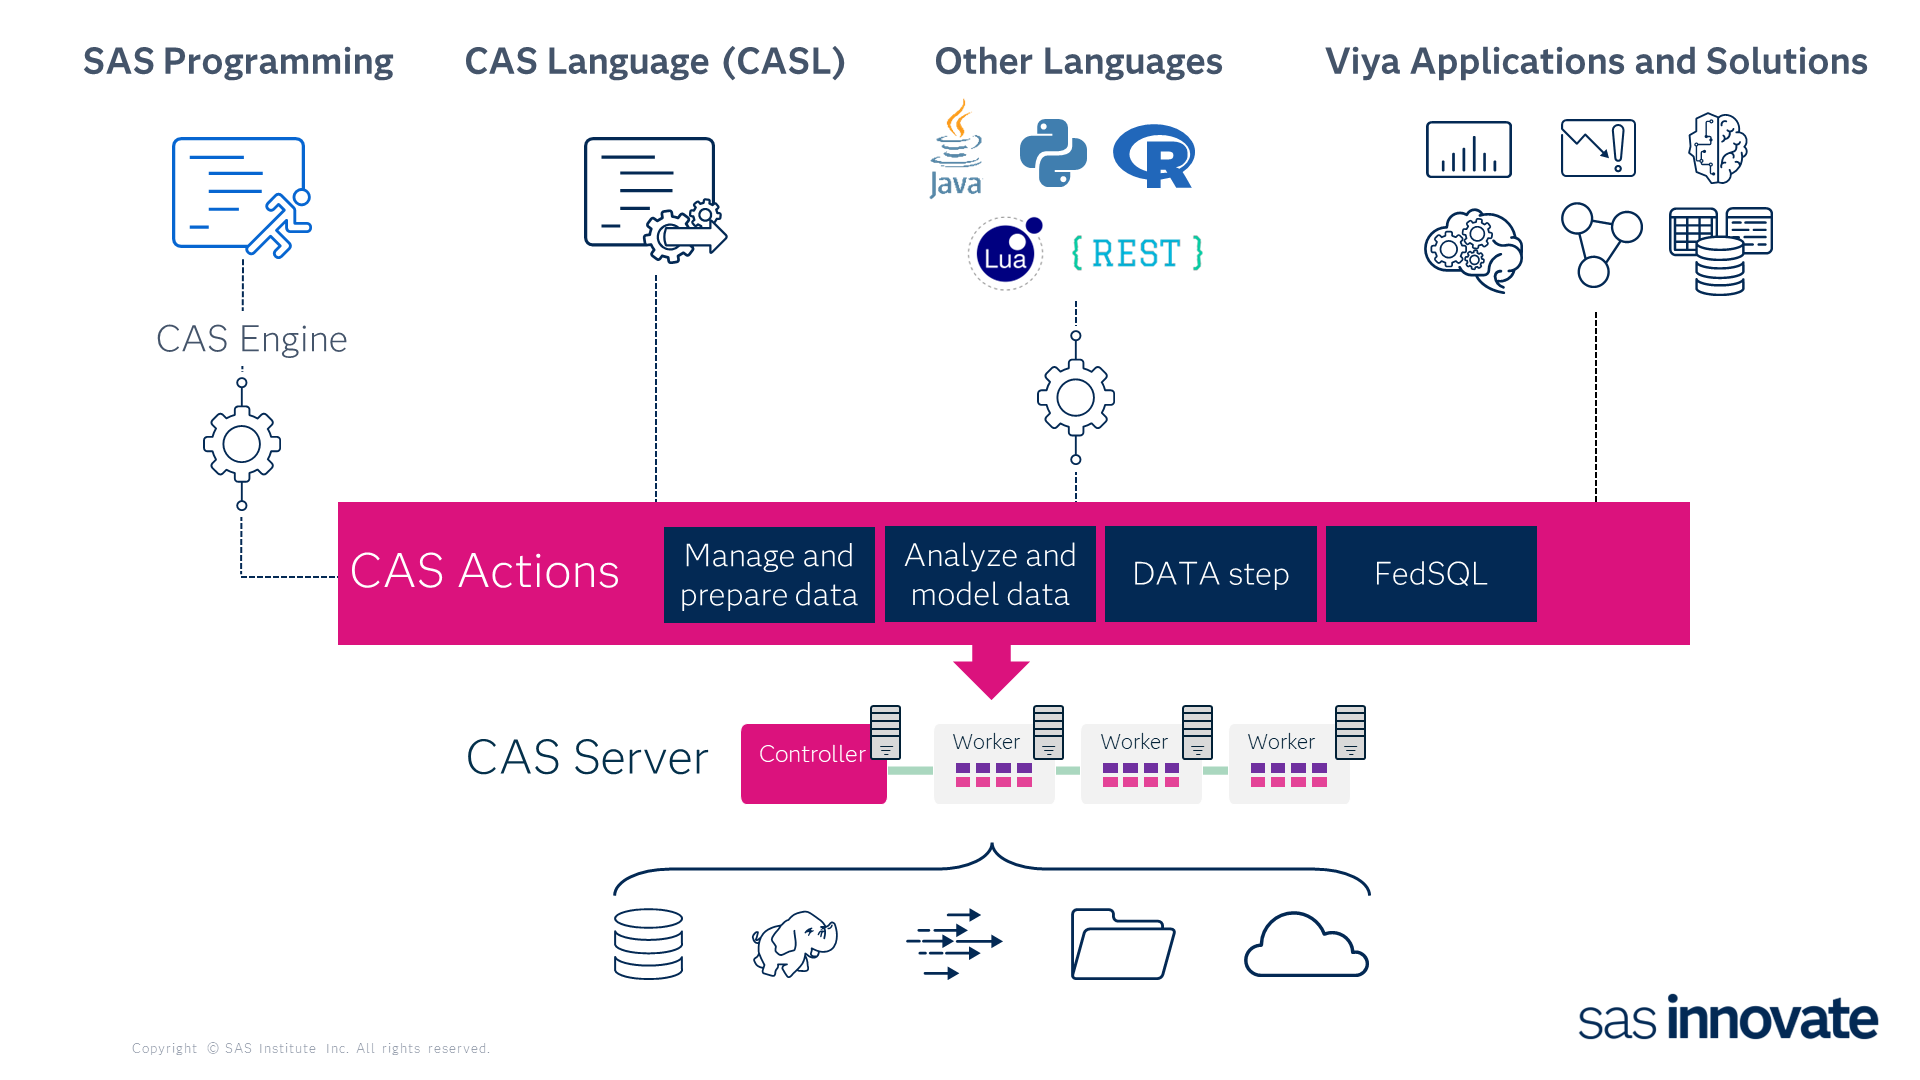

In [10]:
display_image('Innovate2024_05_cas.PNG')

The CAS server needs to access data from some physical data source. CAS can access data from a variety of sources using [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_029/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm), including databases, Hadoop, streaming data, path-based files, and data stored in the cloud.

Once data is loaded into memory on the CAS server, you can process that data using CAS actions. Actions are optimized units of work built for the distributed CAS server. CAS actions provide a range of functionality from managing, processing, analyzing, and modeling data, to executing most traditional SAS DATA step, FedSQL, and even DS2! 

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data.  These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

CAS actions provide a variety of benefits.
- First, CAS actions are optimized to run in the CAS server's massively parallel processing engine for lightening-fast results.
- Second, the same CAS action is used regardless of programming language or application. That means you can use the same CAS action in CASL, Python, R, and more. This enables you to easily pass information between languages.
- When using actions in different languages, the results are equivalent (given seeds).
- Lastly, actions are multi-purpose. Actions perform a specific task, and within that task, an action can also perform a variety of other tasks like create a new table, create calculated columns, filter rows and columns, and group data.

The question is, how can you execute actions? 

SAS Viya provides a variety of interfaces for executing CAS actions. One way to execute actions on the CAS server is to use the native CAS language, or CASL for short. CASL supports executing CAS actions on the CAS server and uses normal programing logic. If you have experience using languages like Lua, Python, or R, CASL will be an easy language to learn.

Instead of using CASL, you can also execute CAS actions through the CAS API using traditional SAS programming, FedSQL, Java, Python, R, Lua, and REST API. This course focuses on using the Python language.

 Lastly, you can use a variety of SAS Viya applications like SAS Visual Analytics to create dashboards, SAS Visual Statistics and SAS Visual Data Mining and Machine Learning for modeling and statistics, and a variety of others. All applications execute actions behind the scenes.


NOTES:
1. With the SAS programming language, many PROCs and much of the traditional DATA step is CAS enabled and can be executed on CAS tables. For more information about how to execute traditional SAS code in SAS Viya, you can view the Programming for SAS Viya course: https://support.sas.com/edu/schedules.html?crs=PGVIYA&ctry=US.
2. For Java, you must use the CASClient class.
3. For Python, R, and Luna, the SWAT package is required. Many familiar methods are available through the SWAT package.
4. The CAS API converts the native language syntax to CAS actions behind the scenes.
5. Visit the SAS website for detailed information about all available SAS Viya offerings.

## CAS Actions

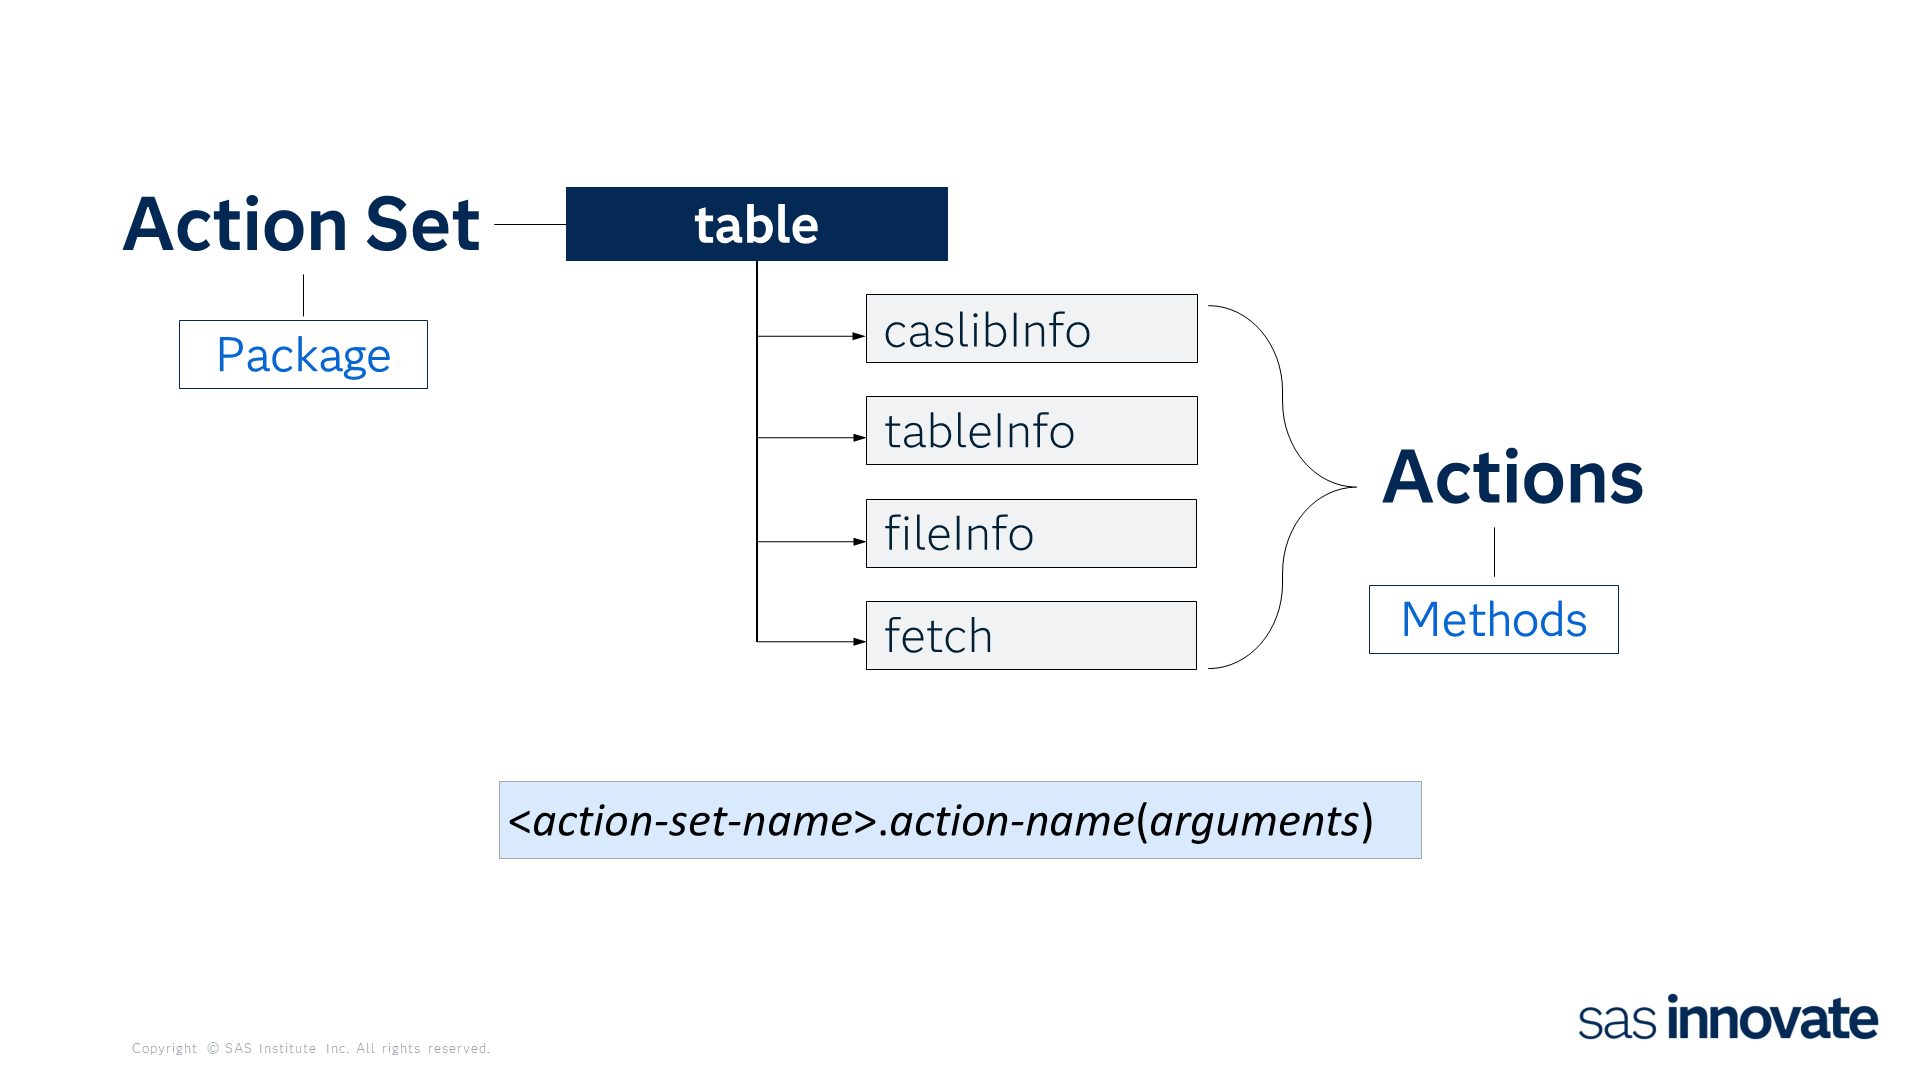

In [11]:
display_image('Innovate2024_06_actions.PNG')

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data. These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

**SAS Documentation**
- [Actions by Name](https://go.documentation.sas.com/doc/en/pgmsascdc/default/allprodsactions/actionsByName.htm)
- [Action Sets by Name](https://go.documentation.sas.com/doc/en/pgmsascdc/default/allprodsactions/actionSetsByName.htm)

## SAS Viya and Python Workflow

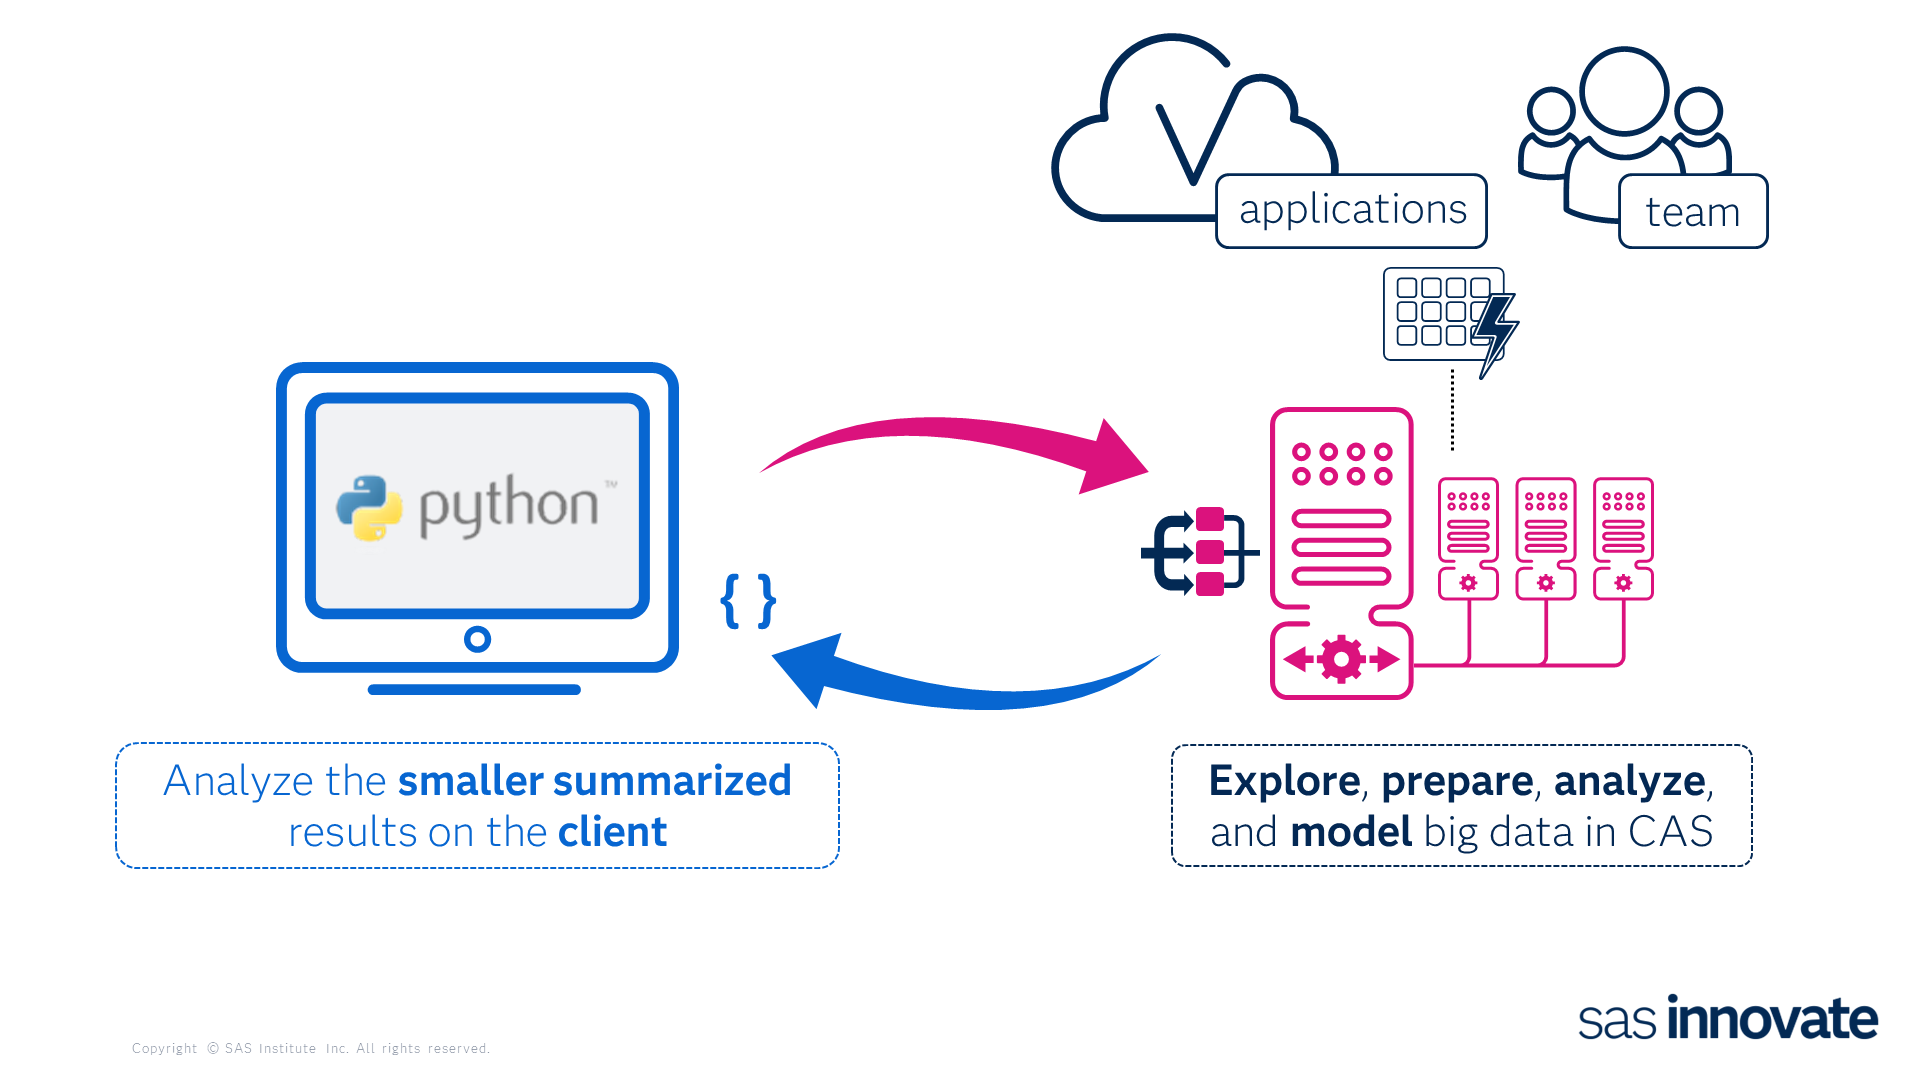

In [12]:
display_image('Innovate2024_07_overview.PNG')

You can use Python on your client to explore, prepare, analyze, and model big data on the CAS server using familiar Python syntax along with CAS actions to take advantage of the parallel processing power of CAS. If you are preparing data in CAS, you can then share that data with other users or other SAS Viya applications like SAS Visual Analytics to create shareable dashboards. 

If you are exploring, analyzing, or modeling data in CAS to take advantage of the in-memory parallel processing power,  CAS returns smaller summarized results back to your local Python client. Once the summarized results from the CAS server are returned to your client, you can use native Python packages on the smaller, more manageable data.


# Begin Hands-On Workshop

In [8]:
## Package required to connect to CAS
import swat         

## Local packages
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

print(f'Python version:{sys.version.split("|")[0]}')
print(f'swat version:{swat.__version__}')
print(f'pandas version:{pd.__version__}')
print(f'numpy version:{np.__version__}')

Python version:3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
swat version:1.13.1
pandas version:1.5.3
numpy version:1.24.3


## 1. Connect to the CAS Server
**To connect to the CAS server, you need**
- the host name 
- the port number 
- authentication.

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

[SWAT Package Authentication Documentation](https://sassoftware.github.io/python-swat/getting-started.html#authentication)

In [11]:
## Enter your comnnection information
## conn = swat.CAS(connection info)

##############################
## My Personal connection   ##
##############################
try:
    from casauth import CASAuth
    print('Imported personal custom CAS auth package')
    path = os.getenv('CAS_CREDENTIALS')
    pem_file = os.getenv('CAS_CLIENT_SSL_CA_LIST')
    conn = CASAuth(path, ssl_ca_list = pem_file)
except:
    print('No connection')
    pass

Imported personal custom CAS auth package
The access token may have expired - attempting to refresh the token
The access token was stored for you in the access_token.txt file. The access token expires in 24 hours.
CAS Connection created


View the type of the **conn** variable. Notice that it is a CAS connection object.

In [12]:
type(conn)

casauth.casauth.CASAuth

Test the CAS connection and view the SAS Viya version.

In [13]:
conn.about()['About']['Viya Version']

NOTE: Grid node action status report: 5 nodes, 9 total actions executed.


'Stable 2023.05'

## 2. Set up the Workshop Data (REQUIRED)
The function below will create the data for this demonstration. It will create a file named **retail_sales.parquet** using sample data that comes with SAS Viya. This should run in all Viya environments.

In [14]:
def setup_demo_data(datasourcefile, incaslib, outfilename, outcaslib, append_value=10, create_local_file = 'N'):
    '''
    Loads a CAS table into memory and then saves it back to a caslib in the specified file format.
    Depending on the size you create this could take a few minutes to run.
    If you create a local file this function could take some time to run. 
    
    Parameters
    -----------------
    datasourcefile : string
        Specify a server-side data source file to load into memory.
    incaslib : string
        Specify the caslib the data source file is located in.
    outfilename : string (filename.extension)
        Specify the name and extension of the file you want to save the CAS table as.
    outcaslib : string
        Specify what caslib to save the file back to.
    append_value : numeric value (default 10)
        Appends the table to itself n times
    create_local_file : values Y or N (default N)
        Will create a copy of the CAS table locally and increase the size of it based on the append_value value.
        Setting this to Y will increase the time for the function to execute. Please be patient.
    '''
    
    # Load data into memory abd name it demo_data in the casuser caslib
    conn.loadTable(path = datasourcefile, caslib = incaslib,
                   casout = {'name':'demo_data_raw', 
                             'caslib':'casuser', 
                             'replace':True})
    
    ## Create local file if requested. This can take between 5-10 minutes depending on the size.
    if create_local_file == 'Y':
        castbl = conn.CASTable('demo_data_raw', caslib = 'casuser')
        df = castbl.to_frame()
        pd.concat([df]*append_value).to_parquet('retail_sales.parquet')
        print('created the retail_sales.parquet file in your local directory')
    
    
    ## Duplicate the CAS table in a DATA step
    inputcastbl = 'casuser.demo_data_raw '
    append_n_times = append_value
    
    conn.runCode(code = f'''
        data casuser.demo_data;
            set {inputcastbl * append_n_times + ';'}
        run;
    ''')

    # Save the demo_data CAS table back to disk
    conn.save(table = {'name':'demo_data', 'caslib':'casuser'},
              name = outfilename, caslib = outcaslib, replace=True)
    
    # Drop the demo_data CAS table
    for castbl in ['demo_data', 'demo_data_raw']:
        conn.dropTable(castbl, caslib = 'casuser', quiet = True)

    
## Load demo data (uncomment the function below to create your data)

# setup_demo_data(datasourcefile='RAND_RETAILDEMO.sashdat', incaslib='samples', 
#                 outfilename='retail_sales.parquet', outcaslib='casuser')

## 3. Explore the Available Data on the CAS Server 

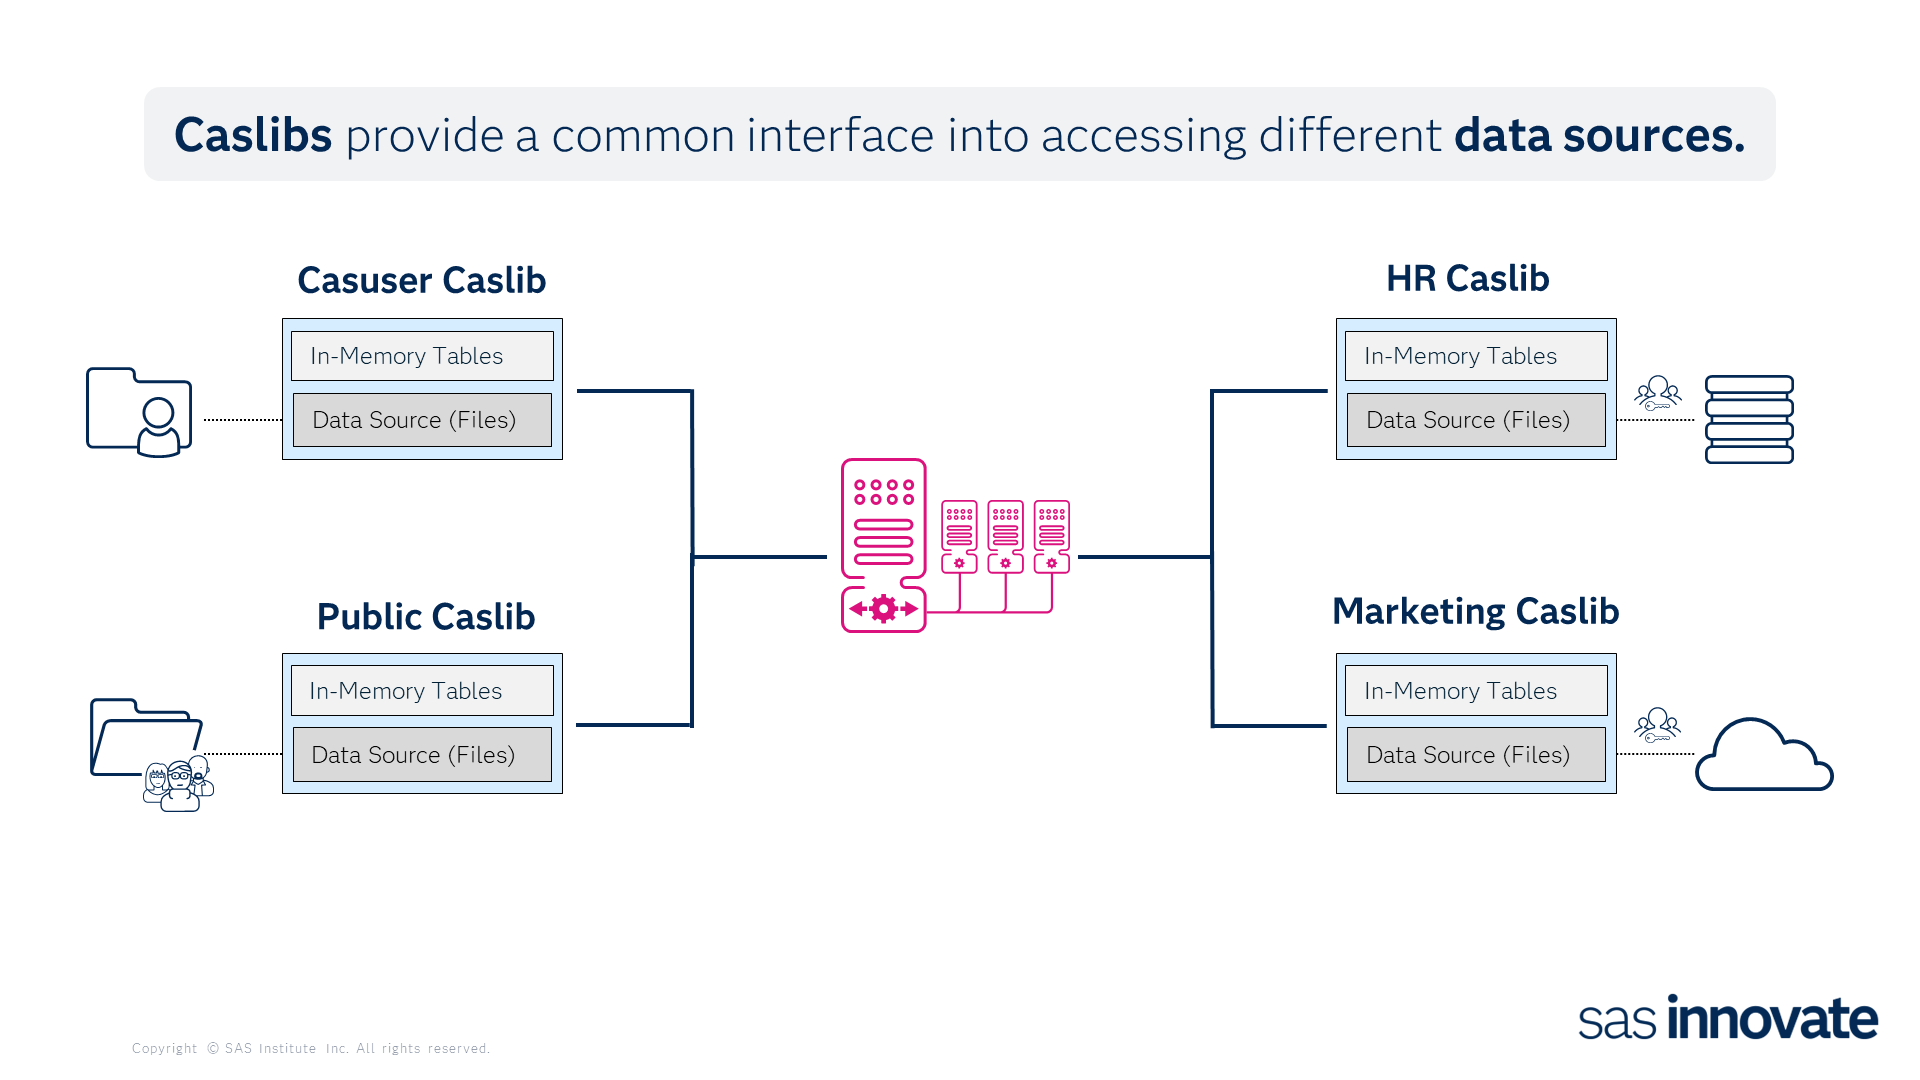

In [13]:
display_image('Innovate2024_08_caslibs.PNG')

CAS stores and accesses data via caslibs. Caslibs provide a common interface into accessing different data sources. No matter which data source you access in CAS, it is connected via a caslib. Caslibs connect into a variety of data sources in your organization.

A caslib consists of three main parts. 

First, there’s the data source portion. The data source portion contains connection information to a physical data source for storage. Data might be stored on disk in a path with familiar formats such as SAS data sets, CSV, Microsoft Excel, or parquet files, or stored in databases, the cloud, Hadoop, or other systems. The data source portion stores the connection and authorization information required for interacting with those files using SAS Viya data connectors. Data stored in the data source portion of a caslib is generally referred to as files. Files in the data source area cannot be processed directly. 

The second part of a caslib is the in-memory portion. The in-memory portion provides a space to hold tables that can have operations performed on them. You can almost think of a CAS table as a DataFrame on the CAS server. A file must first be loaded into memory from a data source. Data loaded into memory is generally referred to as tables or CAS tables. >When they are loaded, in-memory tables are available for processing, and they persist in memory. Because there's no connection between the in-memory copy and the data source file, if you want to permanently keep changes made to the data during processing, the in-memory table should be explicitly written back to the data source. If you are done with the CAS table, you can drop the table. We discuss this more later.

Lastly, a caslib contains access controls about who can access that specific caslib.

### a. View Available Caslibs
The caslibInfo action will display all available data connections to the CAS server.

In [16]:
conn.caslibInfo()

[CASLibInfo]

                                 Name  Type                                        Description                                               Path Definition  Subdirs  Local  Active  Personal  Hidden  Transient
 0   CASUSER(Peter.Styliadis@sas.com)  PATH                        Personal File System Caslib  /cas/data/caslibs/casuserlibraries/peter.styli...                 1.0    0.0     1.0       1.0     0.0        1.0
 1                            cpgretl  PATH                                                                          /cas/data/caslibs/cpgretail/                 1.0    0.0     0.0       0.0     0.0        0.0
 2                         CPSAppData  PATH                                                                         /cas/data/caslibs/CPSAppData/                 0.0    0.0     0.0       0.0     0.0        0.0
 3                             EDUPub  PATH                                                                             /cas/data/caslibs/edupub/                 0.0    0.0     0.0       0.0     0.0        0.0
 4                EP_CommunityCollege  PATH                                                     /cas/data/caslibs/educationpractice/EP_Communi...                 0.0    0.0     0.0       0.0     0.0        0.0
 5                             EP_DOE  PATH                                                           /cas/data/caslibs/educationpractice/EP_DOE/                 0.0    0.0     0.0       0.0     0.0        0.0
 6                     EP_Forecasting  PATH                                                     /cas/data/caslibs/educationpractice/EP_Forecas...                 0.0    0.0     0.0       0.0     0.0        0.0
 7                             EP_K12  PATH                                                           /cas/data/caslibs/educationpractice/EP_K12/                 0.0    0.0     0.0       0.0     0.0        0.0
 8                            EP_SAfE  PATH                                                          /cas/data/caslibs/educationpractice/EP_SAfE/                 0.0    0.0     0.0       0.0     0.0        0.0
 9                          EP_Shapes  PATH                                                        /cas/data/caslibs/educationpractice/EP_Shapes/                 0.0    0.0     0.0       0.0     0.0        0.0
 10                         EP_Sports  PATH                                                        /cas/data/caslibs/educationpractice/EP_Sports/                 0.0    0.0     0.0       0.0     0.0        0.0
 11                     EP_University  PATH                                                     /cas/data/caslibs/educationpractice/EP_Univers...                 0.0    0.0     0.0       0.0     0.0        0.0
 12                      EP_Workforce  PATH                                                     /cas/data/caslibs/educationpractice/EP_Workforce/                 0.0    0.0     0.0       0.0     0.0        0.0
 13                           Formats  PATH                       Stores user defined formats.                         /cas/data/caslibs/formats/                 0.0    0.0     0.0       0.0     0.0        0.0
 14                              GPCI  PATH  Group Lib for Global CI team.   Suneel Grover ...                        /cas/data/caslibs/globalci/                 0.0    0.0     0.0       0.0     0.0        0.0
 15                            GTPPub  PATH                                                                             /cas/data/caslibs/gtppub/                 0.0    0.0     0.0       0.0     0.0        0.0
 16                            images  PATH                                                                             /cas/data/caslibs/images/                 0.0    0.0     0.0       0.0     0.0        0.0
 17                            IoTPub  PATH                                                                             /cas/data/caslibs/iotpub/                 0.0    0.0     0.0       0.0     0.0        

### b. View Available CAS Tables
The [table.tableInfo](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-tableinfo.htm) CAS action will display all available in-memory CAS tables.

View available in-memory tables in the **Samples** caslib.

In [17]:
conn.tableInfo(caslib = 'samples')

[TableInfo]

                               Name                            Label    Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart                               SourceName SourceCaslib  Compressed                         Creator Modifier     SourceModTimeFormatted  SourceModTime
 0  PROMO_EFFECTIVENESS_X_EFFECTS_2  promo_effectiveness_x_effects_2      14       11               0    utf-8  2023-09-11T18:28:00+00:00  2023-09-11T18:28:00+00:00  2023-09-14T12:38:49+00:00        UTF8  2.010076e+09  2.010076e+09  2.010314e+09       1         0     0          0  PROMO_EFFECTIVENESS_X_EFFECTS_2.sashdat      Samples           1  MarioAlberto.Zamarripa@sas.com           2021-12-18T18:35:03+00:00   1.955472e+09
 1                  RAND_RETAILDEMO                                   930046       40               0    utf-8  2023-09-11T18:28:01+00:00  2023-09-11T18:28:01+00:00  2023-09-14T11:00:08+00:00        UTF8  2.010076e+09  2.010076e+09  2.010308e+09       1         0     0          0                  RAND_RETAILDEMO.sashdat      Samples           1  MarioAlberto.Zamarripa@sas.com           2021-12-18T18:35:04+00:00   1.955472e+09
 2                    WATER_CLUSTER                                    46720       21               0    utf-8  2023-09-12T14:55:55+00:00  2023-09-12T14:55:55+00:00  2023-09-14T12:38:37+00:00        UTF8  2.010150e+09  2.010150e+09  2.010314e+09       1         0     0          0                    WATER_CLUSTER.sashdat      Samples           1             Andrew.Wong@sas.com           2021-12-18T18:35:04+00:00   1.955472e+09
 3   SW_LAKE_RT_SENSOR_WATERQUALITY                                     8228       51               0    utf-8  2023-09-13T01:34:18+00:00  2023-09-13T01:34:18+00:00  2023-09-13T01:34:18+00:00        UTF8  2.010188e+09  2.010188e+09  2.010188e+09       1         0     0          0   SW_LAKE_RT_SENSOR_WATERQUALITY.sashdat      Samples           1               XinRu.Lee@sas.com           2021-12-18T18:35:04+00:00   1.955472e+09

+ Elapsed: 0.00979s, user: 0.00731s, sys: 0.0077s, mem: 1.93mb

View available in-memory tables in the **Casuser** caslib.

In [18]:
conn.tableInfo(caslib = 'casuser')

NOTE: No tables are available in caslib CASUSER(Peter.Styliadis@sas.com) of Cloud Analytic Services.


+ Elapsed: 0.00849s, user: 0.00451s, sys: 0.00858s, mem: 1.46mb

### c. View Available Data Source Files
The [table.fileInfo](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-fileinfo.htm)  CAS action will display all available files in a caslib.

View available files in the **Samples** caslib.

In [19]:
conn.fileInfo(caslib = 'samples')

[FileInfo]

    Permission Owner Group                                     Name      Size Encryption                       Time       ModTime
 0  -rwxr-xr-x   sas   sas                       COSTCHANGE.sashdat      9776       NONE  2021-12-18T18:35:03+00:00  1.955472e+09
 1  -rwxr-xr-x   sas   sas  PROMO_EFFECTIVENESS_X_EFFECTS_2.sashdat      9312       NONE  2021-12-18T18:35:03+00:00  1.955472e+09
 2  -rwxr-xr-x   sas   sas                  RAND_RETAILDEMO.sashdat  42612664       NONE  2021-12-18T18:35:04+00:00  1.955472e+09
 3  -rwxr-xr-x   sas   sas   SW_LAKE_RT_SENSOR_WATERQUALITY.sashdat    301312       NONE  2021-12-18T18:35:04+00:00  1.955472e+09
 4  -rwxr-xr-x   sas   sas             WARRANTY_CLAIMS_0117.sashdat  13563272       NONE  2021-12-18T18:35:04+00:00  1.955472e+09
 5  -rwxr-xr-x   sas   sas                    WATER_CLUSTER.sashdat    773208       NONE  2021-12-18T18:35:04+00:00  1.955472e+09
 6  -rwxr-xr-x   sas   sas                  predef_svrtdist.sashdat     78872       NONE  2023-05-09T07:12:44+00:00  1.999236e+09

+ Elapsed: 0.0347s, user: 0.003s, sys: 0.0116s, mem: 1.81mb

View available files in the **Casuser** caslib.

In [20]:
conn.fileInfo(caslib = 'casuser')

[FileInfo]

     Permission Owner Group                            Name       Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas                   cars.sas7bdat     139264             2023-02-23T14:21:31+00:00  1.992781e+09
 1   -rwxr-xr-x   sas   sas          previoussales.sas7bdat      73728             2023-04-26T20:22:48+00:00  1.998160e+09
 2   -rwxr-xr-x   sas   sas                     VTI.sashdat     413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 3   -rwxr-xr-x   sas   sas                    hmeq.sashdat     630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 4   -rwxr-xr-x   sas   sas              tsa_claims_raw.csv   34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 5   -rwxr-xr-x   sas   sas               warranty_demo.csv   53297896             2023-08-08T20:38:15+00:00  2.007146e+09
 6   -rwxr-xr-x   sas   sas          warranty_final.sashdat  116879328       NONE  2023-08-08T20:41:02+00:00  2.007146e+09
 7   -rwxr-xr-x   sas   sas                    cars.parquet       4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas             RAND_RETAILDEMO.csv  240072190             2023-05-30T13:10:38+00:00  2.001071e+09
 9   -rwxr-xr-x   sas   sas              warranty_final.csv   43615117             2023-05-30T13:52:57+00:00  2.001074e+09
 10  -rwxr-xr-x   sas   sas                    cars.sashdat     102936       NONE  2023-05-09T18:03:20+00:00  1.999275e+09
 11  -rwxr-xr-x   sas   sas                        cars.csv      34289             2023-05-09T18:03:20+00:00  1.999275e+09
 12  -rwxr-xr-x   sas   sas                        cars.txt      34289             2023-05-09T18:03:20+00:00  1.999275e+09
 13  -rwxr-xr-x   sas   sas         home_equity_raw.parquet       4096       NONE  2023-05-24T17:41:10+00:00  2.000569e+09
 14  -rwxr-xr-x   sas   sas           previousSales.sashdat       8416       NONE  2023-04-26T20:22:07+00:00  1.998160e+09
 15  -rwxr-xr-x   sas   sas                    products.csv     492125             2023-01-18T12:49:50+00:00  1.989665e+09
 16  -rwxr-xr-x   sas   sas            discount_dim.sashdat     237952       NONE  2023-01-18T12:49:51+00:00  1.989665e+09
 17  -rwxr-xr-x   sas   sas                       heart.csv     458623             2023-01-20T20:41:13+00:00  1.989866e+09
 18  -rwxr-xr-x   sas   sas                   heart_raw.csv     458623             2023-01-20T20:43:00+00:00  1.989867e+09
 19  -rwxr-xr-x   sas   sas             finalRetail.sashdat  410194024       NONE  2023-05-30T13:53:44+00:00  2.001074e+09
 20  -rwxr-xr-x   sas   sas          MULTIPLICATION.sashdat      17832       NONE  2023-06-06T14:21:06+00:00  2.001680e+09
 21  -rwxr-xr-x   sas   sas          warranty_final.parquet       4096       NONE  2023-05-09T18:16:04+00:00  1.999275e+09
 22  -rwxr-xr-x   sas   sas      gov_it_budget_wide.sashdat    7736512       NONE  2023-08-16T14:52:11+00:00  2.007817e+09
 23  -rwxr-xr-x   sas   sas         warranty_claims.parquet       4096       NONE  2023-06-02T15:11:24+00:00  2.001338e+09
 24  -rwxr-xr-x   sas   sas    warranty_claims_test.parquet       4096       NONE  2023-06-02T15:17:55+00:00  2.001338e+09
 25  -rwxr-xr-x   sas   sas           warranty_demo.parquet       4096       NONE  2023-06-05T18:39:16+00:00  2.001610e+09
 26  -rwxr-xr-x   sas   sas               loans_raw.sashdat   13821560       NONE  2023-02-23T14:21:28+00:00  1.992781e+09
 27  -rwxr-xr-x   sas   sas               customers_raw.csv    3101649             2023-02-23T14:21:30+00:00  1.992781e+09
 28  -rwxr-xr-x   sas   sas              appRatings.sashdat    3954240       NONE  2023-02-23T14:21:30+00:00  1.992781e+09
 29  -rwxr-xr-x   sas   sas                   heart.sashdat    1020320       NONE  2023-02-23T14:21:31+00:00  1.992781e+09
 30  -rwxr-xr-x   sas   sas      2023-05-29_wordle_wide.csv     463936             2023-05-29T11:14:20+00:00  2.000978e+09
 31  -rwxr-xr-x   sas   sas      2023-05-29_wordle_l

## 4. Load Data into Memory on the CAS Server (Server-Side)

Use the [table.loadTable](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-loadtable.htm) CAS action to load the **retail_sales.parquet** file into memory on the distributed CAS server. Name the new CAS table **retail_sales** and place it in the **Casuser** caslib. 

**NOTE**: This is similar to using Pandas read_ methods to load files as DataFrames.

In [21]:
conn.loadTable(path = 'retail_sales.parquet', caslib = 'casuser',
               casout = {
                   'name':'retail_sales',
                   'caslib':'casuser',
                   'replace':True
               })

NOTE: Cloud Analytic Services made the file retail_sales.parquet available as table RETAIL_SALES in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'RETAIL_SALES'

[casTable]

 CASTable('RETAIL_SALES', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 12.4s, user: 137s, sys: 39s, mem: 3.8e+03mb

View available in-memory tables in the **Casuser** caslib. Notice that the **RETAIL_SALES** CAS table is now an in-memory CAS table.

In [22]:
conn.tableInfo(caslib = 'casuser')

[TableInfo]

            Name      Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart            SourceName                      SourceCaslib  Compressed                  Creator Modifier SourceModTimeFormatted  SourceModTime
 0  RETAIL_SALES  27901380       40               0    utf-8  2023-09-15T01:23:17+00:00  2023-09-15T01:23:17+00:00  2023-09-15T01:23:17+00:00        UTF8  2.010360e+09  2.010360e+09  2.010360e+09       0         0     0          0  retail_sales.parquet  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com                                            NaN

+ Elapsed: 0.00926s, user: 0.00499s, sys: 0.00962s, mem: 1.84mb

## 5. Explore the CAS Table

### a. Reference the CAS table
Create a client-side reference to the CAS table named **castbl**. Then display the value and type of **castbl**. Notice that it is a **CASTable** object and is referencing the **retail_sales** CAS table in the **Casuser** caslib. 

In [23]:
castbl = conn.CASTable('retail_sales', caslib = 'casuser')

display(type(castbl), castbl)

swat.cas.table.CASTable

CASTable('retail_sales', caslib='casuser')

Preview the CAS table using the SWAT head method.

In [24]:
castbl.head()

Selected Rows from Table RETAIL_SALES

       CustID  bucket   age  loyalty_card   Department brand_name Storechain ChannelType           Class  StoreNum  Storeage trx_hr_char trx_dow_new    trx_tod        Date       MDY    Year  Sales  Cost    mkt_bdgt  Margin       sss             City   City_Lat  City_Long        Country  Country_Lat  Country_Long Region  Region_Lat  Region_Long           Region_2  Region_2_Lat  Region_2_Long State  State_Lat  State_Long age_bucket Storechain1 brand_name1
0  24939857.0     2.0   NaN           0.0  electronics       Pine      GRAND      Resale       computers     736.0      12.0        4 PM         FRI  Afternoon  2009-10-02  10:09:00  2009.0   42.0  11.0  1416362.22   30.85  165122.0       Greensboro  36.079868 -79.819416  United States      35.5585      -79.6546  US_CS        35.0       -79.00   US South Central          35.0         -79.00    NC    35.5585    -79.6546      36-45        MODA       Maple
1  24939881.0     3.0   NaN           0.0  electronics       Pine      GRAND    Internet     home phones     601.0       6.0        8 PM         SAT    Evening  2009-08-08  08:09:00  2009.0   60.0  18.0    53736.90   42.12  122837.0        Davenport  41.542982 -90.590745  United States      41.9716      -93.0540  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    IA    41.9716    -93.0540      36-45        MODA       Maple
2  24939907.0     1.0   NaN           0.0         kids       Pine      GRAND    Internet   kids_handbags     172.0      13.0        4 PM         FRI  Afternoon  2010-01-01  01:10:00  2010.0   15.0   7.0   243498.71    7.78  157889.0       Pittsburgh  40.441419 -79.977292  United States      40.4643      -77.1222  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    PA    40.4643    -77.1222      56-65        MODA       Maple
3  24939921.0     2.0   NaN           0.0         kids       Pine      GRAND    Internet  kids_outerwear     417.0       9.0        2 PM         TUE  Afternoon  2009-11-03  11:09:00  2009.0   30.0  16.0    30193.65   14.01  134641.0  Charlottesville  38.034506 -78.486474  United States      37.6981      -77.8740  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    VA    37.6981    -77.8740    Over 65       GRAND        Pine
4  26505582.0     1.0  30.0           1.0       health      Maple       MODA    Internet         hearing     815.0      10.0        3 PM         SUN  Afternoon  2009-11-29  11:09:00  2009.0    7.0   3.0   863544.08    3.74   13380.0        Ann Arbor  42.274488 -83.739261  United States      42.8535      -84.1439  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    MI    42.8535    -84.1439      46-55       GRAND       Maple

Use the tableDetails CAS action to get detailed information about a CAS table. Notice that the CAS table is broken up into blocks for distributed processing.

In [25]:
castbl.tableDetails()

[TableDetails]

   Node  Blocks  Active      Rows  IndexSize     DataSize  VardataSize  CompressedSize  CompressionRatio  Mapped  MappedMemory  Unmapped  UnmappedMemory  Allocated  AllocatedMemory  DeletedRows TableLocation
 0  ALL   21078   10539  27901380          0  10937340960            0               0                 0   10539   10938562160     10539     10938562160          0                0            0           CAS

+ Elapsed: 0.0132s, user: 0.0125s, sys: 0.00839s, mem: 1.83mb

### b. Preview the CAS Table

You can execute the SWAT head method on a **CASTable** object to return five rows to your Python client. The head method executes on the CAS server, and the CAS server returns five rows to the Python client as a **SASDataFrame** object.

A **SASDataFrame** object is a subclass to a **pandas.DataFrame**. For the most part, you don’t need to worry about the difference between a **SASDataFrame** and a **panda.DataFrame**. They work the same way. The only difference is that a **SASDataFrame** contains extra attributes to store the SAS metadata such as title, label, and name. If you see a **SASDataFrame** object, that data lives on your client.

In [26]:
df = castbl.head()

display(type(df), df)

swat.dataframe.SASDataFrame

Selected Rows from Table RETAIL_SALES

       CustID  bucket   age  loyalty_card   Department brand_name Storechain ChannelType           Class  StoreNum  Storeage trx_hr_char trx_dow_new    trx_tod        Date       MDY    Year  Sales  Cost    mkt_bdgt  Margin       sss             City   City_Lat  City_Long        Country  Country_Lat  Country_Long Region  Region_Lat  Region_Long           Region_2  Region_2_Lat  Region_2_Long State  State_Lat  State_Long age_bucket Storechain1 brand_name1
0  24939857.0     2.0   NaN           0.0  electronics       Pine      GRAND      Resale       computers     736.0      12.0        4 PM         FRI  Afternoon  2009-10-02  10:09:00  2009.0   42.0  11.0  1416362.22   30.85  165122.0       Greensboro  36.079868 -79.819416  United States      35.5585      -79.6546  US_CS        35.0       -79.00   US South Central          35.0         -79.00    NC    35.5585    -79.6546      36-45        MODA       Maple
1  24939881.0     3.0   NaN           0.0  electronics       Pine      GRAND    Internet     home phones     601.0       6.0        8 PM         SAT    Evening  2009-08-08  08:09:00  2009.0   60.0  18.0    53736.90   42.12  122837.0        Davenport  41.542982 -90.590745  United States      41.9716      -93.0540  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    IA    41.9716    -93.0540      36-45        MODA       Maple
2  24939907.0     1.0   NaN           0.0         kids       Pine      GRAND    Internet   kids_handbags     172.0      13.0        4 PM         FRI  Afternoon  2010-01-01  01:10:00  2010.0   15.0   7.0   243498.71    7.78  157889.0       Pittsburgh  40.441419 -79.977292  United States      40.4643      -77.1222  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    PA    40.4643    -77.1222      56-65        MODA       Maple
3  24939921.0     2.0   NaN           0.0         kids       Pine      GRAND    Internet  kids_outerwear     417.0       9.0        2 PM         TUE  Afternoon  2009-11-03  11:09:00  2009.0   30.0  16.0    30193.65   14.01  134641.0  Charlottesville  38.034506 -78.486474  United States      37.6981      -77.8740  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    VA    37.6981    -77.8740    Over 65       GRAND        Pine
4  26505582.0     1.0  30.0           1.0       health      Maple       MODA    Internet         hearing     815.0      10.0        3 PM         SUN  Afternoon  2009-11-29  11:09:00  2009.0    7.0   3.0   863544.08    3.74   13380.0        Ann Arbor  42.274488 -83.739261  United States      42.8535      -84.1439  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    MI    42.8535    -84.1439      46-55       GRAND       Maple

### c. Basic CAS Table Exploration

View the number of rows and columns in a CAS table using the SWAT shape attribute.

In [27]:
castbl.shape

(27901380, 40)

You can also use the numRows CAS action for similar results.

In [28]:
castbl.numRows()

[numrows]

 27901380

+ Elapsed: 0.0112s, user: 0.0148s, sys: 0.00561s, mem: 2.15mb

Use the [table.columnInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-columninfo.htm) CAS action to return column information.

In [29]:
castbl.columnInfo()

[ColumnInfo]

            Column Label  ID    Type  RawLength  FormattedLength Format  NFL  NFD
 0          CustID         1  double          8               12   BEST   12    0
 1          bucket         2  double          8               12   BEST   12    0
 2             age         3  double          8               12   BEST   12    0
 3    loyalty_card         4  double          8               12   BEST   12    0
 4      Department         5    char         11               11      $   11    0
 5      brand_name         6    char          5                5      $    5    0
 6      Storechain         7    char          5                5      $    5    0
 7     ChannelType         8    char          8                8      $    8    0
 8           Class         9    char         21               21      $   21    0
 9        StoreNum        10  double          8               12   BEST   12    0
 10       Storeage        11  double          8               12   BEST   12    0
 11    trx_hr_char        12    char          5                5      $    5    0
 12    trx_dow_new        13    char          3                3      $    3    0
 13        trx_tod        14    char         10               10      $   10    0
 14           Date        15  double          8                9   DATE    9    0
 15            MDY        16  double          8                8   TIME    8    0
 16           Year        17  double          8               12   BEST   12    0
 17          Sales        18  double          8               12   BEST   12    0
 18           Cost        19  double          8               12   BEST   12    0
 19       mkt_bdgt        20  double          8               12   BEST   12    0
 20         Margin        21  double          8               12   BEST   12    0
 21            sss        22  double          8               12   BEST   12    0
 22           City        23    char         21               21      $   21    0
 23       City_Lat        24  double          8               12   BEST   12    0
 24      City_Long        25  double          8               12   BEST   12    0
 25        Country        26    char         13               13      $   13    0
 26    Country_Lat        27  double          8               12   BEST   12    0
 27   Country_Long        28  double          8               12   BEST   12    0
 28         Region        29    char          5                5      $    5    0
 29     Region_Lat        30  double          8               12   BEST   12    0
 30    Region_Long        31  double          8               12   BEST   12    0
 31       Region_2        32    char         17               17      $   17    0
 32   Region_2_Lat        33  double          8               12   BEST   12    0
 33  Region_2_Long        34  double          8               12   BEST   12    0
 34          State        35    char          8                8      $    8    0
 35      State_Lat        36  double          8               12   BEST   12    0
 36     State_Long        37  double          8               12   BEST   12    0
 37     age_bucket        38    char          8                8      $    8    0
 38    Storechain1        39    char          5                5      $    5    0
 39    brand_name1        40    char          5                5      $    5    0

+ Elapsed: 0.0114s, user: 0.00818s, sys: 0.0089s, mem: 2.48mb

View the number of missing values in each column using the SWAT nmiss method. This is similar to using the isna and sum methods in Pandas. The processing will be completed on the distributed CAS server and a **series** will be returned to the Python client.

In [30]:
castbl.nmiss()

CustID                  0
bucket                  0
age              20203410
loyalty_card            0
Department              0
brand_name              0
Storechain              0
ChannelType             0
Class                   0
StoreNum                0
Storeage                0
trx_hr_char           270
trx_dow_new             0
trx_tod                 0
Date                    0
MDY                     0
Year                    0
Sales                   0
Cost                    0
mkt_bdgt                0
Margin                  0
sss                     0
City                    0
City_Lat                0
City_Long               0
Country                 0
Country_Lat             0
Country_Long            0
Region                  0
Region_Lat              0
Region_Long             0
Region_2                0
Region_2_Lat            0
Region_2_Long           0
State                   0
State_Lat               0
State_Long              0
age_bucket              0
Storechain1 

### d. Explore Categorical Columns

Find the count of unique values in a CAS table using the SWAT package value_counts method. The CAS server summarizes the data and returns a **series** to the Python client.

In [31]:
(castbl                          ## CAS table
 .age_bucket                     ## CAS table column
 .value_counts(normalize=True)   ## SWAT package value_counts method
)

26-35      0.179160
36-45      0.178252
46-55      0.172262
56-65      0.167510
18-25      0.167086
Over 65    0.135729
dtype: float64

The SWAT package enables you to summarize your data on the distributed CAS server and then work with the smaller summarized results on the Python client. 

Here we will plot the **series** returned from the CAS server on the client using the Pandas plot method.

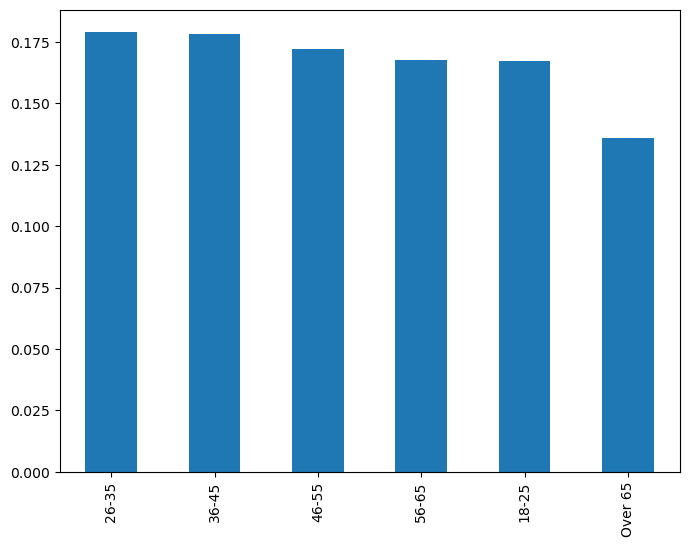

In [32]:
df = (castbl                          ## CAS table
      .age_bucket                     ## CAS table column
      .value_counts(normalize=True)   ## SWAT package value_counts method
)

## Plot the Series on the Python client using Pandas
df.plot(kind='bar', figsize=(8,6));

### e. Explore Numeric Columns

You can view descriptive statistics of a CAS table using the SWAT describe method. Notice that the results are similar to the Pandas describe method.

In [33]:
castbl.describe()

CustID        bucket           age  loyalty_card      StoreNum      Storeage          Date           MDY          Year         Sales          Cost      mkt_bdgt        Margin           sss      City_Lat     City_Long   Country_Lat  Country_Long    Region_Lat   Region_Long  Region_2_Lat  Region_2_Long     State_Lat    State_Long
count  2.790138e+07  2.790138e+07  7.697970e+06  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07  2.790138e+07   2.790138e+07  2.790138e+07  2.790138e+07
mean   1.857178e+07  1.582845e+00  4.357741e+01  2.758993e-01  6.126681e+02  8.423475e+00  1.820285e+04  3.232570e+04  2.009143e+03  4.197586e+01  1.364745e+01  6.575598e+05  2.837336e+01  8.633577e+04  3.691084e+01 -9.119452e+01  3.701263e+01 -9.145084e+01  3.930507e+01 -9.085200e+01  3.930507e+01  -9.085200e+01  3.701263e+01 -9.145084e+01
std    1.367594e+07  6.160740e-01  1.962638e+01  4.469663e-01  3.488004e+02  4.944200e+00  5.133438e+01  1.245919e+04  3.505409e-01  3.180609e+01  8.126207e+00  1.158654e+06  2.784831e+01  6.786333e+04  5.278887e+00  1.600990e+01  5.114275e+00  1.593983e+01  5.633576e+00  1.694443e+01  5.633576e+00   1.694443e+01  5.114275e+00  1.593983e+01
min    1.900000e+01  1.000000e+00  1.800000e+01  0.000000e+00  2.000000e+00  1.000000e+00  1.811100e+04  4.200000e+03  2.009000e+03  0.000000e+00  0.000000e+00  0.000000e+00 -5.891000e+01  7.030000e+02  2.130895e+01 -1.578262e+02  2.117650e+01 -1.575721e+02  3.000000e+01 -1.210000e+02  3.000000e+01  -1.210000e+02  2.117650e+01 -1.575721e+02
25%    5.607946e+06  1.000000e+00  2.800000e+01  0.000000e+00  3.170000e+02  5.000000e+00  1.815800e+04  2.934000e+04  2.009000e+03  2.100000e+01  8.000000e+00  2.250530e+04  1.139000e+01  1.408000e+03  3.352475e+01 -9.733379e+01  3.335230e+01 -9.744230e+01  3.500000e+01 -1.060000e+02  3.500000e+01  -1.060000e+02  3.335230e+01 -9.744230e+01
50%    1.390594e+07  2.000000e+00  3.900000e+01  0.000000e+00  6.020000e+02  8.000000e+00  1.820600e+04  3.654000e+04  2.009000e+03  3.500000e+01  1.300000e+01  6.602812e+04  2.227000e+01  9.359100e+04  3.803451e+01 -8.574953e+01  3.769810e+01 -8.643100e+01  4.030000e+01 -8.475000e+01  4.030000e+01  -8.475000e+01  3.769810e+01 -8.643100e+01
75%    3.152353e+07  2.000000e+00  5.600000e+01  1.000000e+00  9.000000e+02  1.100000e+01  1.824700e+04  4.014000e+04  2.009000e+03  5.800000e+01  1.800000e+01  8.635441e+05  4.209000e+01  1.466220e+05  4.070423e+01 -7.903947e+01  4.123400e+01 -7.965460e+01  4.330000e+01 -7.500000e+01  4.330000e+01  -7.500000e+01  4.123400e+01 -7.965460e+01
max    4.818873e+07  3.000000e+00  1.400000e+02  1.000000e+00  1.279000e+03  2.900000e+01  1.829200e+04  4.374000e+04  2.010000e+03  1.210800e+04  1.500000e+02  5.094381e+06  1.210791e+04  1.994130e+05  4.767334e+01 -7.096147e+01  4.735220e+01 -7.137800e+01  4.700000e+01 -7.450000e+01  4.700000e+01  -7.450000e+01  4.735220e+01 -7.137800e+01

You can also use the [simple.summary](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-simple-summary.htm?fromDefault=) CAS action will return similar results.

In [34]:
castbl.summary()

[Summary]

 Descriptive Statistics for RETAIL_SALES
 
            Column           Min           Max           N       NMiss          Mean           Sum           Std       StdErr           Var           USS           CSS          CV        TValue  ProbT   Skewness      Kurtosis
 0          CustID     19.000000  4.818873e+07  27901380.0         0.0  1.857178e+07  5.181783e+14  1.367594e+07  2589.073674  1.870314e+14  1.484193e+22  5.218434e+21   73.638289  7.173137e+03    0.0   0.198292     -1.509770
 1          bucket      1.000000  3.000000e+00  27901380.0         0.0  1.582845e+00  4.416357e+07  6.160740e-01     0.000117  3.795471e-01  8.049399e+07  1.058989e+07   38.921929  1.357121e+04    0.0   0.557789     -0.607680
 2             age     18.000000  1.400000e+02   7697970.0  20203410.0  4.357741e+01  3.354576e+08  1.962638e+01     0.007074  3.851948e+02  1.758359e+10  2.965217e+09   45.037966  6.160406e+03    0.0   0.973199      0.692346
 3    loyalty_card      0.000000  1.000000e+00  27901380.0         0.0  2.758993e-01  7.697970e+06  4.469663e-01     0.000085  1.997789e-01  7.697970e+06  5.574106e+06  162.003441  3.260533e+03    0.0   1.002764     -0.994465
 4        StoreNum      2.000000  1.279000e+03  27901380.0         0.0  6.126681e+02  1.709429e+10  3.488004e+02     0.066033  1.216617e+05  1.386765e+13  3.394531e+12   56.931387  9.278143e+03    0.0   0.104865     -1.113285
 5        Storeage      1.000000  2.900000e+01  27901380.0         0.0  8.423475e+00  2.350266e+08  4.944200e+00     0.000936  2.444512e+01  2.661793e+09  6.820524e+08   58.695495  8.999286e+03    0.0   0.775757      0.785840
 6            Date  18111.000000  1.829200e+04  27901380.0         0.0  1.820285e+04  5.078847e+11  5.133438e+01     0.009718  2.635219e+03  9.245022e+15  7.352624e+10    0.282013  1.873027e+06    0.0  -0.066527     -1.204526
 7             MDY   4200.000000  4.374000e+04  27901380.0         0.0  3.232570e+04  9.019315e+11  1.245919e+04     2.358722  1.552313e+08  3.348673e+16  4.331167e+15   38.542667  1.370475e+04    0.0  -1.443317      0.902234
 8            Year   2009.000000  2.010000e+03  27901380.0         0.0  2.009143e+03  5.605788e+10  3.505409e-01     0.000066  1.228789e-01  1.126283e+14  3.428492e+06    0.017447  3.027507e+07    0.0   2.034230      2.138093
 9           Sales      0.000000  1.210800e+04  27901380.0         0.0  4.197586e+01  1.171185e+09  3.180609e+01     0.006021  1.011627e+03  7.738727e+10  2.822579e+10   75.772317  6.971115e+03    0.0  60.358790  22281.893247
 10           Cost      0.000000  1.500000e+02  27901380.0         0.0  1.364745e+01  3.807827e+08  8.126207e+00     0.001538  6.603524e+01  7.039188e+09  1.842474e+09   59.543774  8.871080e+03    0.0   1.911011     10.743114
 11       mkt_bdgt      0.000000  5.094381e+06  27901380.0         0.0  6.575598e+05  1.834682e+13  1.158654e+06   219.351665  1.342479e+12  4.952115e+19  3.745702e+19  176.205128  2.997742e+03    0.0   2.192342      4.421893
 12         Margin    -58.910000  1.210791e+04  27901380.0         0.0  2.837336e+01  7.916560e+08  2.784831e+01     0.005272  7.755281e+02  4.410025e+10  2.163830e+10   98.149465  5.381767e+03    0.0  89.493852  38082.408168
 13            sss    703.000000  1.994130e+05  27901380.0         0.0  8.633577e+04  2.408887e+12  6.786333e+04    12.847610  4.605432e+09  3.364710e+17  1.284979e+17   78.603955  6.719987e+03    0.0  -0.026699     -1.455369
 14       City_Lat     21.308950  4.767334e+01  27901380.0         0.0  3.691084e+01  1.029863e+09  5.278887e+00     0.000999  2.786665e+01  3.879064e+10  7.775180e+08   14.301727  3.693383e+04    0.0  -0.289909     -0.483010
 15      City_Long   -157.826182 -7.096147e+01  27901380.0         0.0 -9.119452e+01 -2.544453e+09  1.600990e+01     0.003031  2.563168e+02  2.391918e+11  7.151592e+09  -17.555765 -3.008798e+04    0.0  -0.931738      0.081552
 16    Country_Lat     21.176500  4.735220e+01  27901380.0         0.0  3.701263e+01  1.032703e+09  5.11

### f. Filter CAS Tables

You can use the SWAT query method to query a CAS table. This works similarly to the Pandas query method.

In [35]:
(castbl                            ## CASTable object
 .query('age_bucket = "26-35"')    ## SWAT query method
 .loyalty_card                     ## CAS column
 .value_counts()                   ## SWAT value_counts method
)

0.0    3609630
1.0    1389180
dtype: int64

### g. Group CAS Tables

You can also aggregate data by groups using the SWAT groupby method. This is similar to the Pandas groupby method.

In [36]:
(castbl                             ## CASTable object
 .groupby(['Year','age_bucket'])    ## Grouping columns
 .loc[:,['Sales','Cost']]           ## Sepcify the columns to aggregate
 .sum()                             ## Aggregate function
)

Sales        Cost
Year   age_bucket                         
2009.0 18-25       183707280.0  58169700.0
       26-35       198375360.0  62826570.0
       36-45       186569100.0  59502420.0
       46-55       169532910.0  54570000.0
       56-65       155362950.0  50033490.0
       Over 65     125540130.0  40518210.0
2010.0 18-25        15037110.0   5415540.0
       26-35        15163920.0   5471820.0
       36-45        22792320.0   8337900.0
       46-55        30241140.0  11012850.0
       56-65        38030760.0  13813410.0
       Over 65      30831570.0  11110800.0

### h. Execute SQL on the CAS Server

In [37]:
## Load the fedSQL action set to execute SQL in CAS.
conn.loadActionSet('fedSQL')

## Store a simple SQL query
myQuery = '''
    select year, 
           age_bucket,
           sum(sales) as Total_Sales,
           sum(cost) as Total_Cost
        from casuser.retail_sales
        group by year, age_bucket
        order by year, age_bucket
'''

## Execute the query in the CAS server
cr = conn.execDirect(query = myQuery)

display(type(cr), cr)

NOTE: Added action set 'fedSQL'.


swat.cas.results.CASResults

[Result Set]

       Year age_bucket  TOTAL_SALES  TOTAL_COST
 0   2009.0      18-25  183707280.0  58169700.0
 1   2009.0      26-35  198375360.0  62826570.0
 2   2009.0      36-45  186569100.0  59502420.0
 3   2009.0      46-55  169532910.0  54570000.0
 4   2009.0      56-65  155362950.0  50033490.0
 5   2009.0    Over 65  125540130.0  40518210.0
 6   2010.0      18-25   15037110.0   5415540.0
 7   2010.0      26-35   15163920.0   5471820.0
 8   2010.0      36-45   22792320.0   8337900.0
 9   2010.0      46-55   30241140.0  11012850.0
 10  2010.0      56-65   38030760.0  13813410.0
 11  2010.0    Over 65   30831570.0  11110800.0

+ Elapsed: 5.99s, user: 54.5s, sys: 7.63s, mem: 1.52e+03mb

After the data is summarized by the CAS server and returned to the client, you can process the data locally using familiar packages.

year age_bucket  total_sales  total_cost
0  2009      18-25  183707280.0  58169700.0
1  2009      26-35  198375360.0  62826570.0
2  2009      36-45  186569100.0  59502420.0
3  2009      46-55  169532910.0  54570000.0
4  2009      56-65  155362950.0  50033490.0
5  2009    Over 65  125540130.0  40518210.0
6  2010      18-25   15037110.0   5415540.0
7  2010      26-35   15163920.0   5471820.0
8  2010      36-45   22792320.0   8337900.0
9  2010      46-55   30241140.0  11012850.0

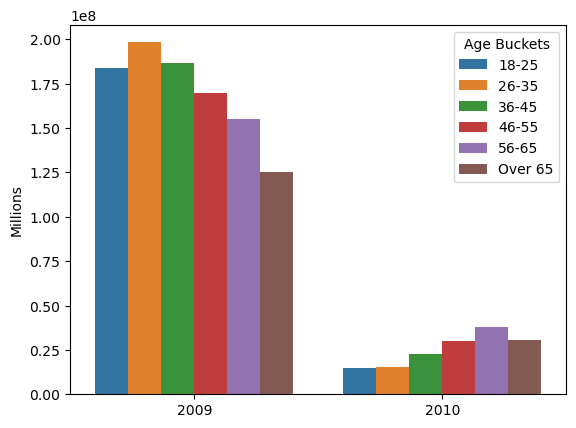

In [38]:
df = (cr['Result Set']
      .assign(Year = lambda _df: _df.Year.astype('int32'))
      .rename(columns=str.lower)
     )

display(df.head(10))

## Plot the DataFrame using seaborn
ax = sns.barplot(data=df, x='year', y='total_sales', hue='age_bucket')
ax.legend(title='Age Buckets')
ax.set_xlabel('')
ax.set_ylabel('Millions');

## 5. Prepre the CAS Table

Preview the CAS table.

In [39]:
castbl.head()

Selected Rows from Table RETAIL_SALES

       CustID  bucket   age  loyalty_card   Department brand_name Storechain ChannelType           Class  StoreNum  Storeage trx_hr_char trx_dow_new    trx_tod        Date       MDY    Year  Sales  Cost    mkt_bdgt  Margin       sss             City   City_Lat  City_Long        Country  Country_Lat  Country_Long Region  Region_Lat  Region_Long           Region_2  Region_2_Lat  Region_2_Long State  State_Lat  State_Long age_bucket Storechain1 brand_name1
0  24939857.0     2.0   NaN           0.0  electronics       Pine      GRAND      Resale       computers     736.0      12.0        4 PM         FRI  Afternoon  2009-10-02  10:09:00  2009.0   42.0  11.0  1416362.22   30.85  165122.0       Greensboro  36.079868 -79.819416  United States      35.5585      -79.6546  US_CS        35.0       -79.00   US South Central          35.0         -79.00    NC    35.5585    -79.6546      36-45        MODA       Maple
1  24939881.0     3.0   NaN           0.0  electronics       Pine      GRAND    Internet     home phones     601.0       6.0        8 PM         SAT    Evening  2009-08-08  08:09:00  2009.0   60.0  18.0    53736.90   42.12  122837.0        Davenport  41.542982 -90.590745  United States      41.9716      -93.0540  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    IA    41.9716    -93.0540      36-45        MODA       Maple
2  24939907.0     1.0   NaN           0.0         kids       Pine      GRAND    Internet   kids_handbags     172.0      13.0        4 PM         FRI  Afternoon  2010-01-01  01:10:00  2010.0   15.0   7.0   243498.71    7.78  157889.0       Pittsburgh  40.441419 -79.977292  United States      40.4643      -77.1222  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    PA    40.4643    -77.1222      56-65        MODA       Maple
3  24939921.0     2.0   NaN           0.0         kids       Pine      GRAND    Internet  kids_outerwear     417.0       9.0        2 PM         TUE  Afternoon  2009-11-03  11:09:00  2009.0   30.0  16.0    30193.65   14.01  134641.0  Charlottesville  38.034506 -78.486474  United States      37.6981      -77.8740  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    VA    37.6981    -77.8740    Over 65       GRAND        Pine
4  26505582.0     1.0  30.0           1.0       health      Maple       MODA    Internet         hearing     815.0      10.0        3 PM         SUN  Afternoon  2009-11-29  11:09:00  2009.0    7.0   3.0   863544.08    3.74   13380.0        Ann Arbor  42.274488 -83.739261  United States      42.8535      -84.1439  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    MI    42.8535    -84.1439      46-55       GRAND       Maple

### a. Create CAS Table Columns

Create two new columns in the CAS table using the eval method. The eval method takes [SAS functions](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/lefunctionsref/n01f5qrjoh9h4hn1olbdpb5pr2td.htm).

In [40]:
castbl.eval('Profit = Sales - Cost')
castbl.eval("loyalty_card_value = IFC(loyalty_card=0,'No Loyalty Card','Loyalty Card')")

View the **CASTable** object. Notice that the eval method added parameters to the **CASTable** object on how to calculate the columns. A **CASTable** object is lazily evaluated and the columns will be calculated only when an action or method is executed on the object.

In [41]:
castbl.params

{'name': 'retail_sales',
 'caslib': 'casuser',
 'computedvars': ['Profit', 'loyalty_card_value'],
 'computedvarsprogram': "Profit =  Sales - Cost; Profit = Profit; loyalty_card_value =  IFC(loyalty_card=0,'No Loyalty Card','Loyalty Card'); loyalty_card_value = loyalty_card_value; "}

Execute the head method on the **CASTable** object. Notice that the new columns were created.

In [42]:
castbl.head()

Selected Rows from Table RETAIL_SALES

       CustID  bucket   age  loyalty_card   Department brand_name Storechain ChannelType           Class  StoreNum  Storeage trx_hr_char trx_dow_new    trx_tod        Date       MDY    Year  Sales  Cost    mkt_bdgt  Margin       sss             City   City_Lat  City_Long        Country  Country_Lat  Country_Long Region  Region_Lat  Region_Long           Region_2  Region_2_Lat  Region_2_Long State  State_Lat  State_Long age_bucket Storechain1 brand_name1  Profit loyalty_card_value
0  24939857.0     2.0   NaN           0.0  electronics       Pine      GRAND      Resale       computers     736.0      12.0        4 PM         FRI  Afternoon  2009-10-02  10:09:00  2009.0   42.0  11.0  1416362.22   30.85  165122.0       Greensboro  36.079868 -79.819416  United States      35.5585      -79.6546  US_CS        35.0       -79.00   US South Central          35.0         -79.00    NC    35.5585    -79.6546      36-45        MODA       Maple    31.0    No Loyalty Card
1  24939881.0     3.0   NaN           0.0  electronics       Pine      GRAND    Internet     home phones     601.0       6.0        8 PM         SAT    Evening  2009-08-08  08:09:00  2009.0   60.0  18.0    53736.90   42.12  122837.0        Davenport  41.542982 -90.590745  United States      41.9716      -93.0540  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    IA    41.9716    -93.0540      36-45        MODA       Maple    42.0    No Loyalty Card
2  24939907.0     1.0   NaN           0.0         kids       Pine      GRAND    Internet   kids_handbags     172.0      13.0        4 PM         FRI  Afternoon  2010-01-01  01:10:00  2010.0   15.0   7.0   243498.71    7.78  157889.0       Pittsburgh  40.441419 -79.977292  United States      40.4643      -77.1222  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    PA    40.4643    -77.1222      56-65        MODA       Maple     8.0    No Loyalty Card
3  24939921.0     2.0   NaN           0.0         kids       Pine      GRAND    Internet  kids_outerwear     417.0       9.0        2 PM         TUE  Afternoon  2009-11-03  11:09:00  2009.0   30.0  16.0    30193.65   14.01  134641.0  Charlottesville  38.034506 -78.486474  United States      37.6981      -77.8740  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    VA    37.6981    -77.8740    Over 65       GRAND        Pine    14.0    No Loyalty Card
4  26505582.0     1.0  30.0           1.0       health      Maple       MODA    Internet         hearing     815.0      10.0        3 PM         SUN  Afternoon  2009-11-29  11:09:00  2009.0    7.0   3.0   863544.08    3.74   13380.0        Ann Arbor  42.274488 -83.739261  United States      42.8535      -84.1439  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    MI    42.8535    -84.1439      46-55       GRAND       Maple     4.0       Loyalty Card

### b. Create a New CAS Table

Create a new CAS table that contains the two new columns from above.

In [43]:
castbl.copyTable(casout={'name':'sales_final', 
                         'caslib':'casuser', 
                         'label':'Final table with two new calculated columns'})

[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'SALES_FINAL'

[casTable]

 CASTable('SALES_FINAL', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 8.47s, user: 65.4s, sys: 68.6s, mem: 7.33e+03mb

View all available in-memory CAS tables. Confirm that the new **SALES_FINAL** CAS table was created.

In [44]:
conn.tableInfo(caslib = 'casuser')

[TableInfo]

            Name                                        Label      Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart            SourceName                      SourceCaslib  Compressed                  Creator Modifier SourceModTimeFormatted  SourceModTime
 0  RETAIL_SALES                                               27901380       40               0    utf-8  2023-09-15T01:23:17+00:00  2023-09-15T01:23:17+00:00  2023-09-15T01:24:33+00:00        UTF8  2.010360e+09  2.010360e+09  2.010360e+09       0         0     0          0  retail_sales.parquet  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com                                            NaN
 1   SALES_FINAL  Final table with two new calculated columns  27901380       42               0    utf-8  2023-09-15T01:24:33+00:00  2023-09-15T01:24:33+00:00  2023-09-15T01:24:33+00:00        UTF8  2.010360e+09  2.010360e+09  2.010360e+09       0         0     0          0                                                                   0  Peter.Styliadis@sas.com                                            NaN

+ Elapsed: 0.0101s, user: 0.00123s, sys: 0.0142s, mem: 1.86mb

Reference and preview the new **SALES_FINAL** CAS table.

In [45]:
final_castbl = conn.CASTable('sales_final', caslib = 'casuser')

display(final_castbl, final_castbl.head())

CASTable('sales_final', caslib='casuser')

Selected Rows from Table SALES_FINAL

       CustID  bucket   age  loyalty_card   Department brand_name Storechain ChannelType           Class  StoreNum  Storeage trx_hr_char trx_dow_new    trx_tod        Date       MDY    Year  Sales  Cost  mkt_bdgt  Margin       sss             City   City_Lat   City_Long        Country  Country_Lat  Country_Long Region  Region_Lat  Region_Long           Region_2  Region_2_Lat  Region_2_Long State  State_Lat  State_Long age_bucket Storechain1 brand_name1  Profit loyalty_card_value
0  24552915.0     1.0   NaN           0.0         kids       Pine      GRAND    Internet  kids_bookcases     529.0       7.0        7 PM         THU    Evening  2009-11-19  11:09:00  2009.0   14.0   6.0  91594.72    7.89  158702.0        Baltimore  39.307956  -76.617016  United States      39.1513      -76.7954  US_AT        40.3       -74.50  US Atlantic Coast          40.3         -74.50    MD    39.1513    -76.7954      26-35        FAST         Oak     8.0    No Loyalty Card
1  24552929.0     3.0   NaN           0.0      grocery       Pine      GRAND    Internet    paper_towels     369.0      10.0        2 PM         SUN  Afternoon  2009-08-09  08:09:00  2009.0   63.0  14.0  12598.32   48.53  175477.0         Portland  45.523040 -122.640155  United States      44.7156     -122.5848  US_WC        47.0      -121.00      US West Coast          47.0        -121.00    OR    44.7156   -122.5848      36-45       GRAND       Maple    49.0    No Loyalty Card
2  24552933.0     1.0  24.0           1.0      grocery       Pine      GRAND       Store            oils     564.0       7.0        3 PM         SUN  Afternoon  2009-12-27  12:09:00  2009.0   14.0  12.0   8943.04    2.30  112696.0          Seattle  47.626353 -122.333144  United States      47.3522     -121.6130  US_WC        47.0      -121.00      US West Coast          47.0        -121.00    WA    47.3522   -121.6130      56-65        MODA       Maple     2.0       Loyalty Card
3  24552937.0     2.0   NaN           0.0  electronics       Pine      GRAND    Internet     home phones     467.0       8.0        4 PM         TUE  Afternoon  2009-08-18  08:09:00  2009.0   56.0  17.0  20808.37   39.40   83788.0        Las Vegas  36.194168 -115.222060  United States      37.4211     -116.5728  US_WC        47.0      -121.00      US West Coast          47.0        -121.00    NV    37.4211   -116.5728      26-35       GRAND        Pine    39.0    No Loyalty Card
4  24552967.0     2.0   NaN           0.0         kids       Pine      GRAND    Internet   kids_handbags     350.0      10.0        5 PM         SAT  Afternoon  2009-10-31  10:09:00  2009.0   21.0  13.0  26158.05    8.39  140101.0  Rochester Hills  42.665706  -83.158137  United States      42.8535      -84.1439  US_MW        43.3       -84.75         US Midwest          43.3         -84.75    MI    42.8535    -84.1439      18-25        FAST         Oak     8.0    No Loyalty Card

### c. Save the CAS Table to the Data Source
Save a CAS table to a caslib's data source using the [table.save](https://go.documentation.sas.com/doc/en/pgmsascdc/v_037/caspg/cas-table-save.htm) CAS action. This is similar to saving a DataFrame back to disk using a to_ method in Pandas.

In [46]:
final_castbl.save(name = 'sales_final.sashdat', caslib = 'casuser', replace = True)

# final_castbl.save(name = 'sales_final.parquet', caslib = 'casuser', replace = True)

# final_castbl.save(name = 'sales_final.csv', caslib = 'casuser', replace = True)

NOTE: Cloud Analytic Services saved the file sales_final.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'sales_final.sashdat'

+ Elapsed: 25.1s, user: 4.67s, sys: 27.6s, mem: 340mb

View the newly saved files in the **Casuser** caslib. Confirm that the **sales_final.sashdat** file was created.

In [47]:
conn.fileInfo(caslib = 'casuser')

[FileInfo]

     Permission Owner Group                            Name         Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas                   cars.sas7bdat       139264             2023-02-23T14:21:31+00:00  1.992781e+09
 1   -rwxr-xr-x   sas   sas          previoussales.sas7bdat        73728             2023-04-26T20:22:48+00:00  1.998160e+09
 2   -rwxr-xr-x   sas   sas                     VTI.sashdat       413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 3   -rwxr-xr-x   sas   sas                    hmeq.sashdat       630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 4   -rwxr-xr-x   sas   sas              tsa_claims_raw.csv     34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 5   -rwxr-xr-x   sas   sas               warranty_demo.csv     53297896             2023-08-08T20:38:15+00:00  2.007146e+09
 6   -rwxr-xr-x   sas   sas          warranty_final.sashdat    116879328       NONE  2023-08-08T20:41:02+00:00  2.007146e+09
 7   -rwxr-xr-x   sas   sas                    cars.parquet         4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas             RAND_RETAILDEMO.csv    240072190             2023-05-30T13:10:38+00:00  2.001071e+09
 9   -rwxr-xr-x   sas   sas              warranty_final.csv     43615117             2023-05-30T13:52:57+00:00  2.001074e+09
 10  -rwxr-xr-x   sas   sas                    cars.sashdat       102936       NONE  2023-05-09T18:03:20+00:00  1.999275e+09
 11  -rwxr-xr-x   sas   sas                        cars.csv        34289             2023-05-09T18:03:20+00:00  1.999275e+09
 12  -rwxr-xr-x   sas   sas                        cars.txt        34289             2023-05-09T18:03:20+00:00  1.999275e+09
 13  -rwxr-xr-x   sas   sas         home_equity_raw.parquet         4096       NONE  2023-05-24T17:41:10+00:00  2.000569e+09
 14  -rwxr-xr-x   sas   sas           previousSales.sashdat         8416       NONE  2023-04-26T20:22:07+00:00  1.998160e+09
 15  -rwxr-xr-x   sas   sas                    products.csv       492125             2023-01-18T12:49:50+00:00  1.989665e+09
 16  -rwxr-xr-x   sas   sas            discount_dim.sashdat       237952       NONE  2023-01-18T12:49:51+00:00  1.989665e+09
 17  -rwxr-xr-x   sas   sas                       heart.csv       458623             2023-01-20T20:41:13+00:00  1.989866e+09
 18  -rwxr-xr-x   sas   sas                   heart_raw.csv       458623             2023-01-20T20:43:00+00:00  1.989867e+09
 19  -rwxr-xr-x   sas   sas             finalRetail.sashdat    410194024       NONE  2023-05-30T13:53:44+00:00  2.001074e+09
 20  -rwxr-xr-x   sas   sas          MULTIPLICATION.sashdat        17832       NONE  2023-06-06T14:21:06+00:00  2.001680e+09
 21  -rwxr-xr-x   sas   sas          warranty_final.parquet         4096       NONE  2023-05-09T18:16:04+00:00  1.999275e+09
 22  -rwxr-xr-x   sas   sas      gov_it_budget_wide.sashdat      7736512       NONE  2023-08-16T14:52:11+00:00  2.007817e+09
 23  -rwxr-xr-x   sas   sas         warranty_claims.parquet         4096       NONE  2023-06-02T15:11:24+00:00  2.001338e+09
 24  -rwxr-xr-x   sas   sas    warranty_claims_test.parquet         4096       NONE  2023-06-02T15:17:55+00:00  2.001338e+09
 25  -rwxr-xr-x   sas   sas           warranty_demo.parquet         4096       NONE  2023-06-05T18:39:16+00:00  2.001610e+09
 26  -rwxr-xr-x   sas   sas               loans_raw.sashdat     13821560       NONE  2023-02-23T14:21:28+00:00  1.992781e+09
 27  -rwxr-xr-x   sas   sas               customers_raw.csv      3101649             2023-02-23T14:21:30+00:00  1.992781e+09
 28  -rwxr-xr-x   sas   sas              appRatings.sashdat      3954240       NONE  2023-02-23T14:21:30+00:00  1.992781e+09
 29  -rwxr-xr-x   sas   sas                   heart.sashdat      1020320       NONE  2023-02-23T14:21:31+00:00  1.992781e+09
 30  -rwxr-xr-x   sas   sas      2023-05-29_wordle_wide.csv       463936             2023-05-29T11:14:20+00:00  2

## 6. Doing More with the SAS Viya Platform

### a. Machine learning
You can use action sets like the [Regression Action Set](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casactstat/casactstat_regression_toc.htm?fromDefault=) to perform machine learning on the distributed CAS server. This example use the GLM action to fit linear regression models using the method of least squares.

In [48]:
conn.loadActionSet('regression')

target = 'Sales'
inputs = ['Cost', 'mkt_bdgt', 'Margin']

final_castbl.glm(target = target,
                 inputs = inputs)

NOTE: Added action set 'regression'.


[ANOVA]

 Analysis of Variance
 
    RowId           Source          DF            SS            MS        FValue  ProbF
 0  MODEL            Model         3.0  2.822150e+10  9.407168e+09  6.124270e+10    0.0
 1  ERROR            Error  27901376.0  4.285783e+06  1.536047e-01           NaN    NaN
 2  TOTAL  Corrected Total  27901379.0  2.822579e+10           NaN           NaN    NaN

[Dimensions]

 Dimensions
 
       RowId           Description  Value
 0  NEFFECTS     Number of Effects      4
 1    NPARMS  Number of Parameters      4

[FitStatistics]

 Fit Statistics
 
        RowId Description         Value
 0       RMSE    Root MSE  3.919244e-01
 1    RSQUARE    R-Square  9.998482e-01
 2     ADJRSQ    Adj R-Sq  9.998482e-01
 3        AIC         AIC -2.436830e+07
 4       AICC        AICC -2.436830e+07
 5        SBC         SBC -5.226962e+07
 6  TRAIN_ASE         ASE  1.536047e-01

[ModelInfo]

 Model Information
 
          RowId        Description        Value
 0         DATA        Data Source  SALES_FINAL
 1  RESPONSEVAR  Response Variable        Sales

[NObs]

 Number of Observations
 
    RowId                  Description       Value
 0  NREAD  Number of Observations Read  27901380.0
 1  NUSED  Number of Observations Used  27901380.0

[ParameterEstimates]

 Parameter Estimates
 
       Effect  Parameter  DF      Estimate        StdErr         tValue         Probt
 0  Intercept  Intercept   1 -1.278417e-03  1.483977e-04      -8.614799  7.006790e-18
 1       Cost       Cost   1  9.945659e-01  1.024287e-05   97098.377984  0.000000e+00
 2   mkt_bdgt   mkt_bdgt   1  7.645401e-09  6.710510e-11     113.931741  0.000000e+00
 3     Margin     Margin   1  1.000897e+00  2.874842e-06  348157.302987  0.000000e+00

[Timing]

 Task Timing
 
             RowId                  Task      Time   RelTime
 0           SETUP     Setup and Parsing  0.028516  0.064690
 1    LEVELIZATION          Levelization  0.218475  0.495623
 2  INITIALIZATION  Model Initialization  0.002326  0.005276
 3            SSCP      SSCP Computation  0.174417  0.395675
 4         FITTING         Model Fitting  0.009421  0.021372
 5         CLEANUP               Cleanup  0.006489  0.014721
 6           TOTAL                 Total  0.440809  1.000000

+ Elapsed: 0.463s, user: 19.1s, sys: 6.87s, mem: 133mb

### b. Other SAS Viya Applications
You can use other SAS Viya applications like SAS Visual Analytics on the data you prepared using Python.

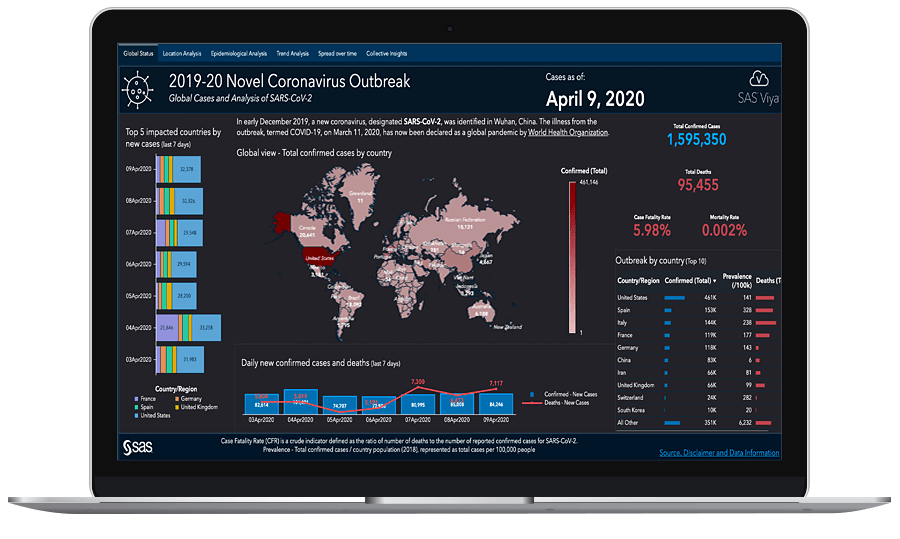

In [49]:
display_image('00_VA_Covid.png')

#### Open SAS Visual Analytics and Access the CAS Table
1. Open a new tab in your browser.
2. Log in to SAS Viya.
3. At the top left click the **Applications menu** ![Image](https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/Icons_ApplicationButton.png) icon.
4. Select **Explore and Visualize** to access the SAS Visual Analytics application.
5. Then select **Start with Data > Data Sources > cas-shared-default > Casuser**.
6. Right-click the **sales_final.sashdat** file and select **Load**. This will load the final data into memory.

## 7. Terminate the CAS Connection

Let's delete the files we created in this demo using the [deleteSource](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-deletesource.htm) CAS action.

In [50]:
delFiles = ['retail_sales.parquet', 'sales_final.sashdat']

for file in delFiles:
    conn.deleteSource(source = file, caslib = 'casuser', quiet = True) 

NOTE: Cloud Analytic Services removed the source data retail_sales.parquet from caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services removed the source data sales_final.sashdat from caslib CASUSER(Peter.Styliadis@sas.com).


When you are finished, it's best practice to terminate your CAS connection.

In [51]:
conn.terminate()

## Thank you!

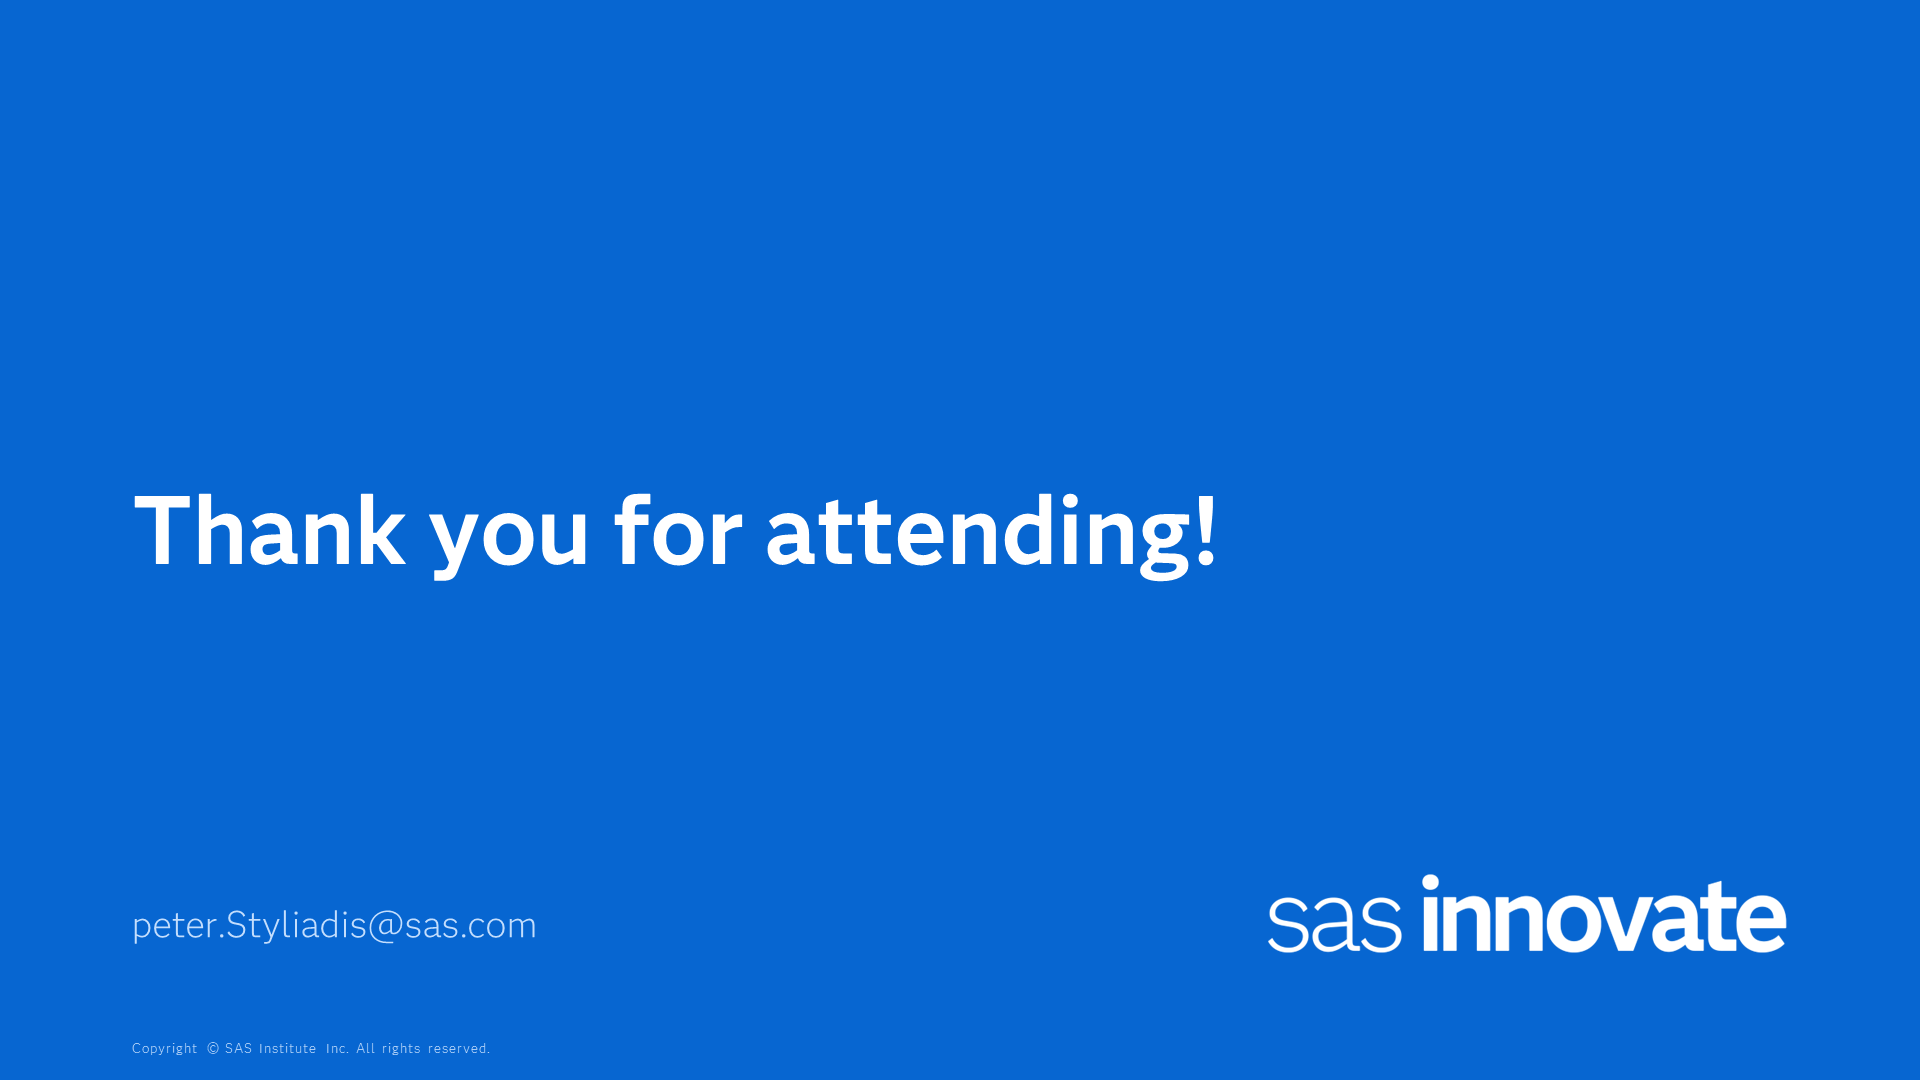

In [15]:
display_image('Innovate2024_09_thank_you.PNG')

# Additional Resources

SAS Documentation 
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)

SAS Viya Quick Start Videos
- [Viya Quick Start Tutorials](https://www.youtube.com/watch?v=6eiE1i8QFMQ&list=PLVV6eZFA22Qw2bmAI5_K2P3xU_CVx20n5)

Blog Series 
- [Getting Started with Python Integration to SAS® Viya®](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/) 
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

SAS Courses 
- [SAS® Viya® and Python Integration Fundamentals](https://support.sas.com/edu/schedules.html?crs=PIVY&ctry=US) 
- [SAS® Viya® and Python Integration for Machine Learning](https://support.sas.com/edu/schedules.html?crs=POSI34&ctry=US)
- [High-Performance Data Processing with CASL in SAS® Viya®](https://support.sas.com/edu/schedules.html?crs=CASL&ctry=US)

Additional Resources
- [My Python-Integration-to-SAS-Viya GitHub Repo](https://github.com/pestyld/Python-Integration-to-SAS-Viya)
- [SAS Viya Quick Start Videos](https://video.sas.com/category/videos/sas-viya-quick-start)
- SAS Explore 2022 - [Using Python for Data Analytics in SAS Viya](https://www.youtube.com/watch?v=skd9-it5NPU)
- Free Webinar - [Ask the Expert Webinar - How Do I Use Python in SAS® Viya®?](https://www.sas.com/en_us/webinars/use-python-in-sas-viya.html)
- YouTube Tutorial - [SAS Tutorial | Python Integration with SAS Viya](https://www.youtube.com/watch?v=6cDU6JGEYSo)
- SAS Viya - [Getting Started with the Python Interface of SAS Viya](https://video.sas.com/detail/video/5430217787001/getting-started-with-the-python-interface-of-sas-viya)
- SAS Communities - [Loading Data from Python into CAS](https://communities.sas.com/t5/SAS-Communities-Library/Loading-Data-from-Python-into-CAS/ta-p/263567)
- SAS Communities - [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)
- SAS Paper - [Seriously Serial or Perfectly Parallel Data Transfer with SAS® Viya®](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3479-2019.pdf)
- SAS Communities - [Hotwire your SWAT inside SAS Studio!](https://communities.sas.com/t5/SAS-Communities-Library/Hotwire-your-SWAT-inside-SAS-Studio/ta-p/835956)

# Thank You for Attending!

## Connect with me on LinkedIn!
[Peter Styliadis](https://www.linkedin.com/in/peter-styliadis-712bb357/) Technical Training Consultant at SAS